## Multi Blob Data Set 

GMM

<Figure size 1200x800 with 0 Axes>

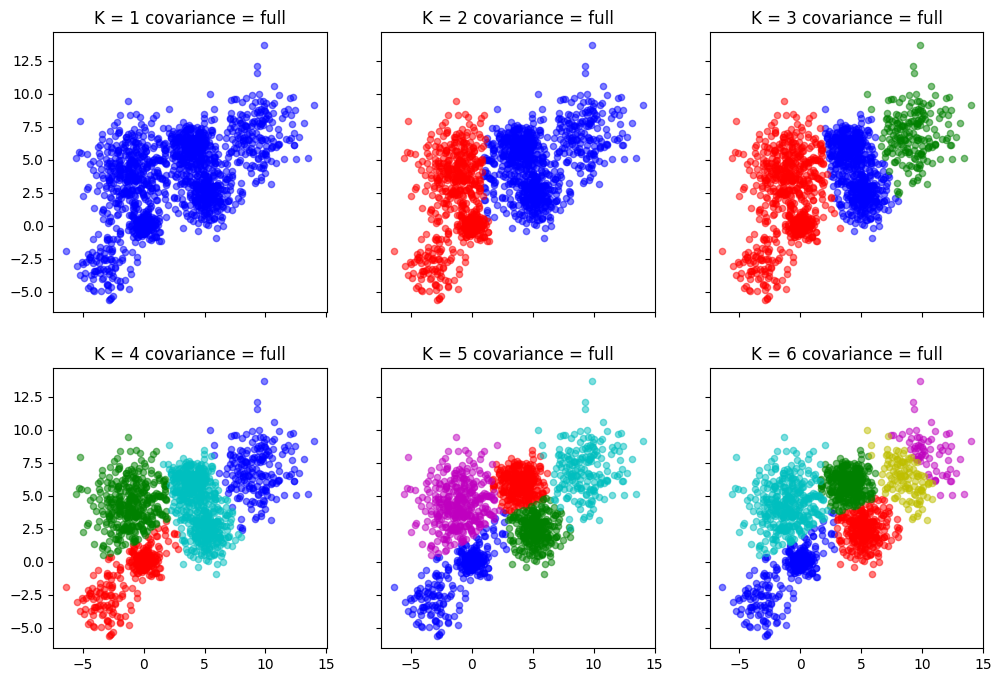

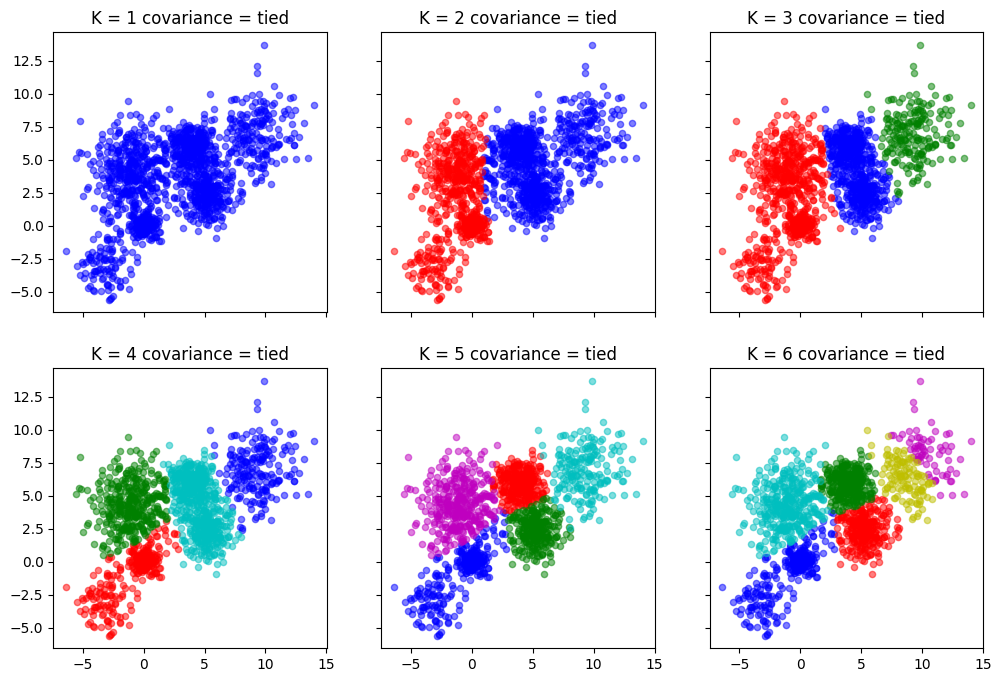

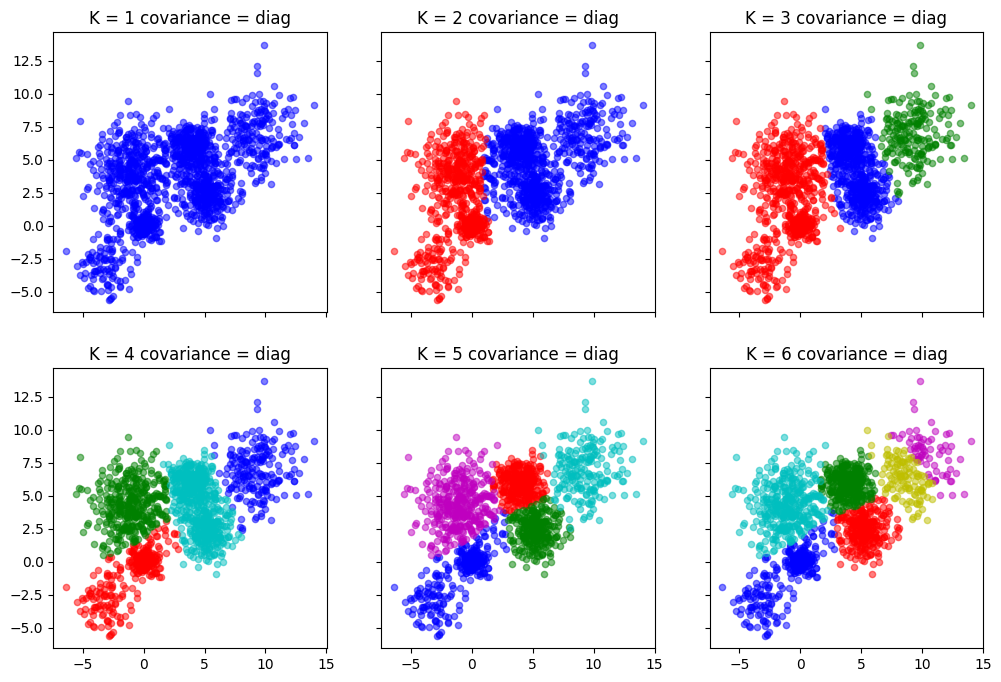

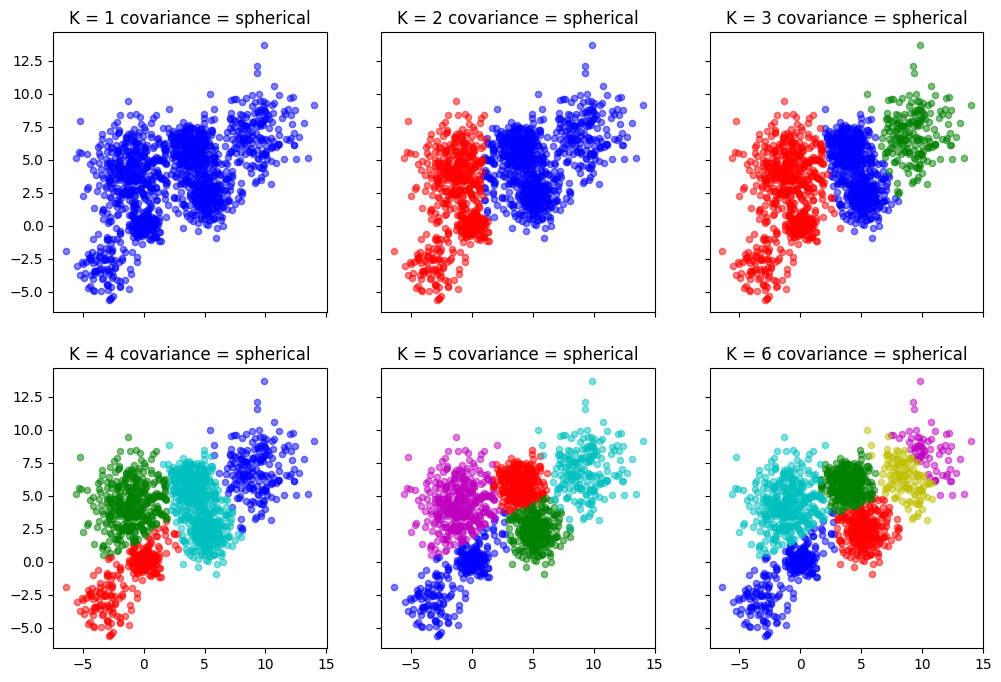

<Figure size 1200x800 with 0 Axes>

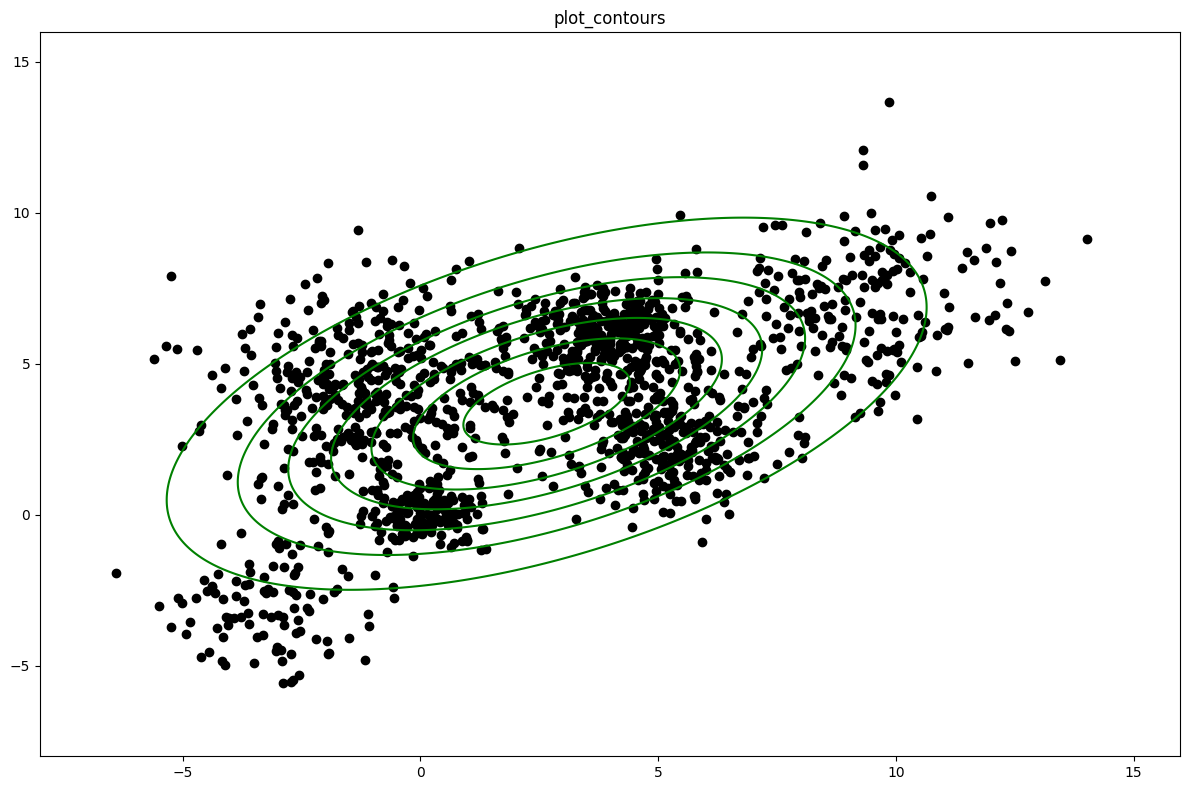

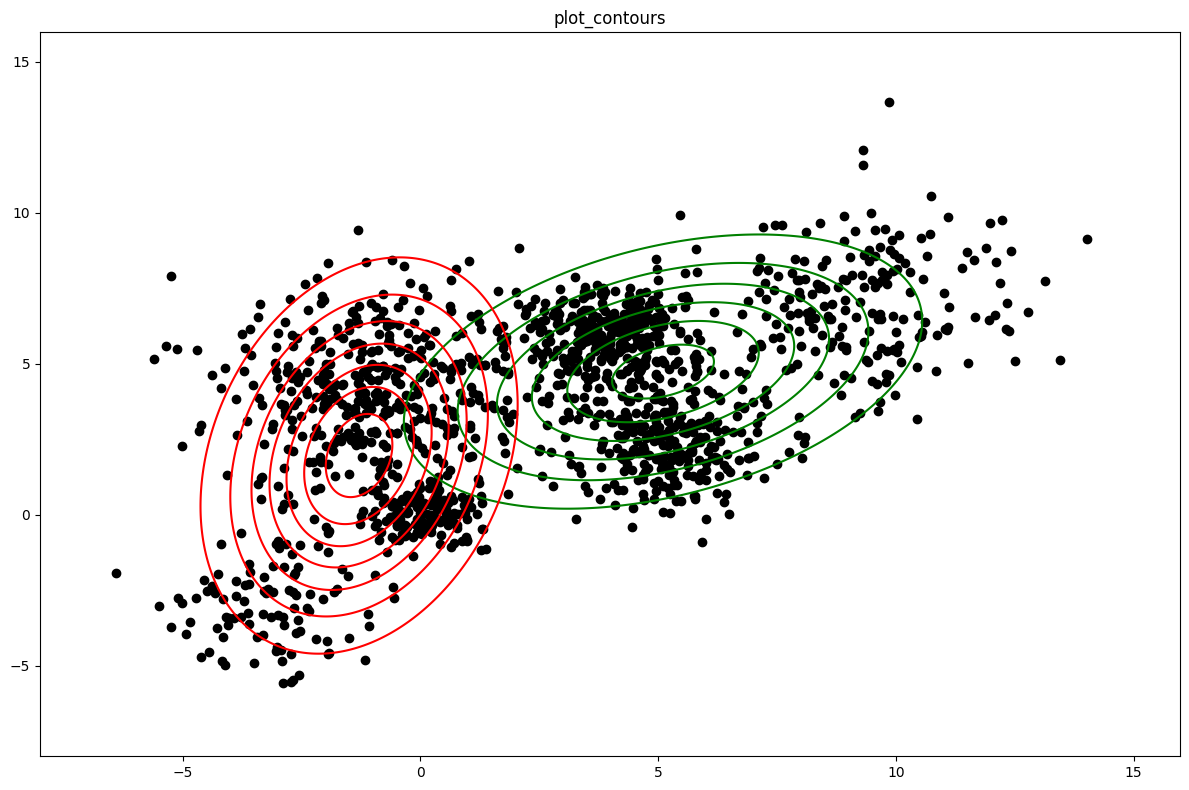

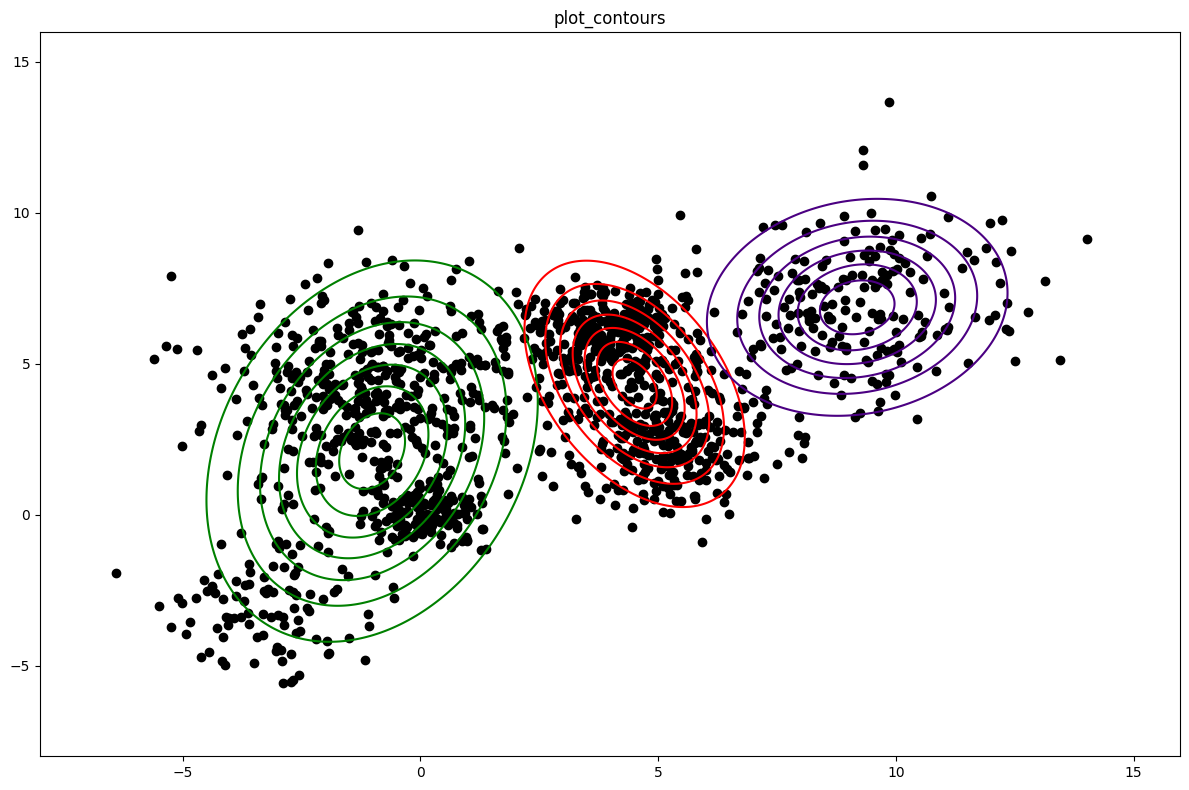

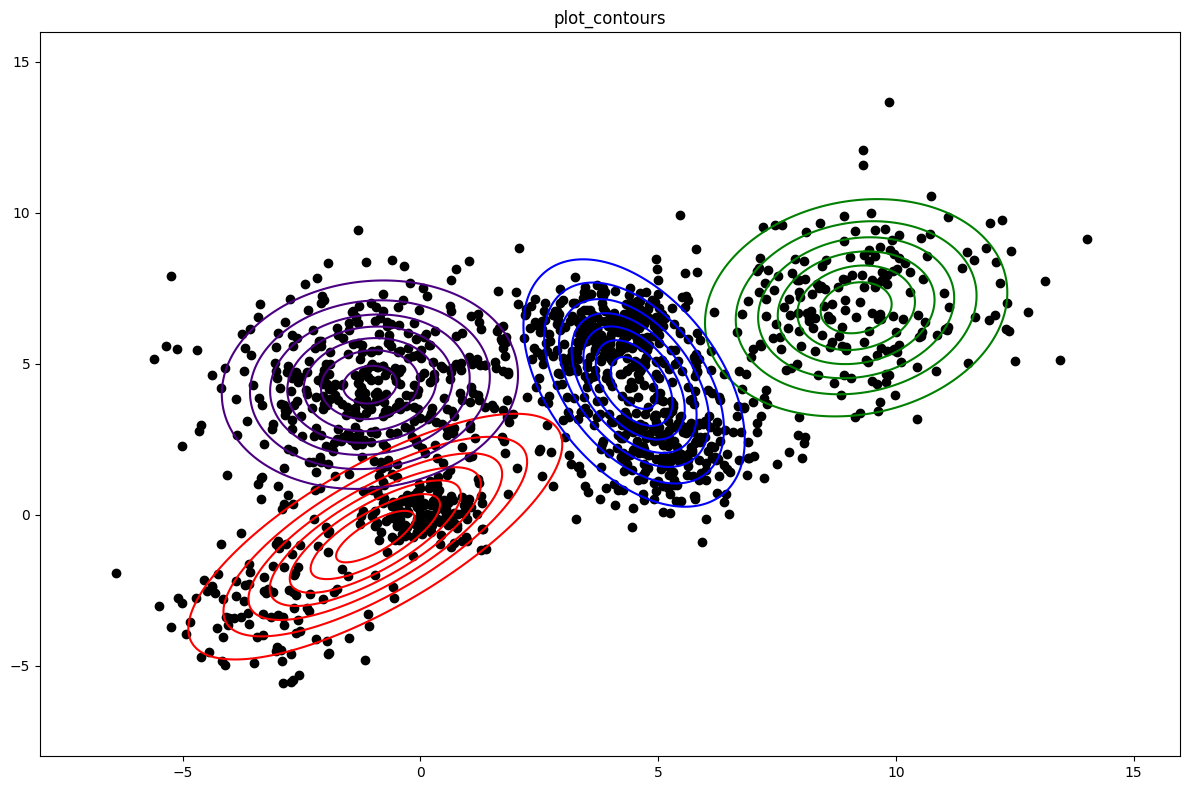

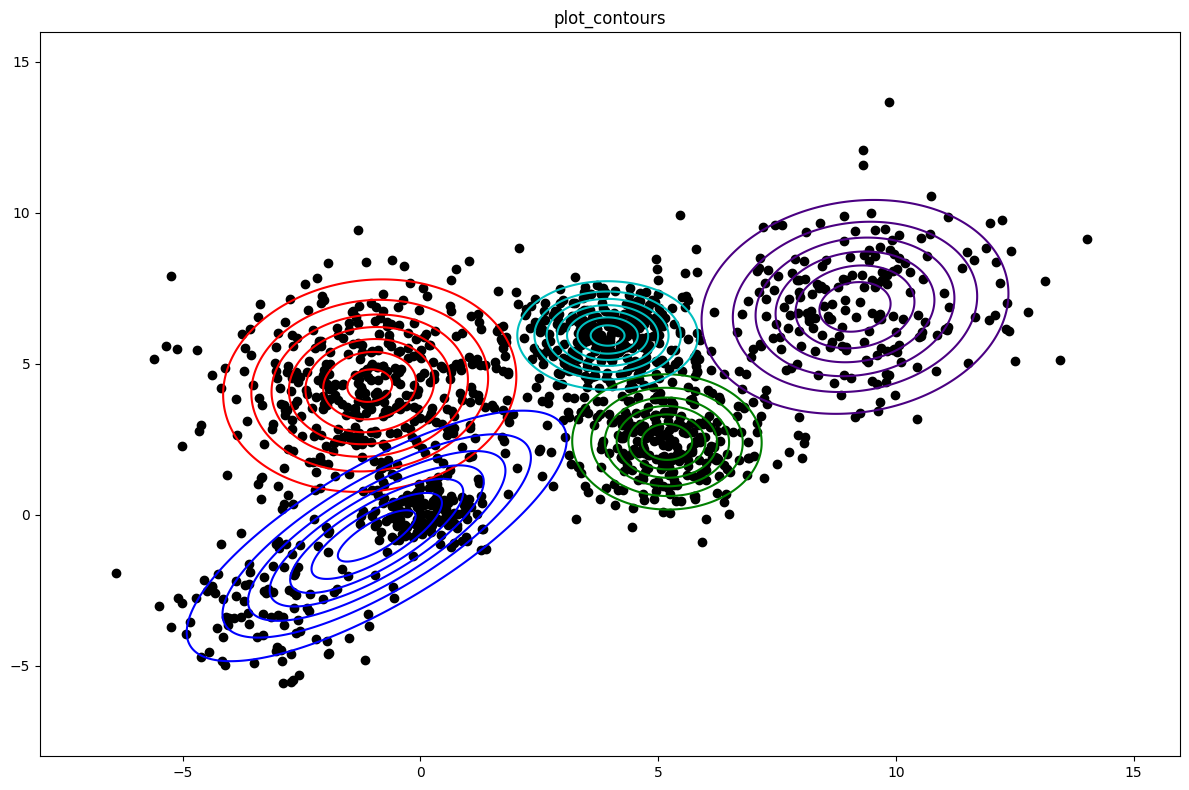

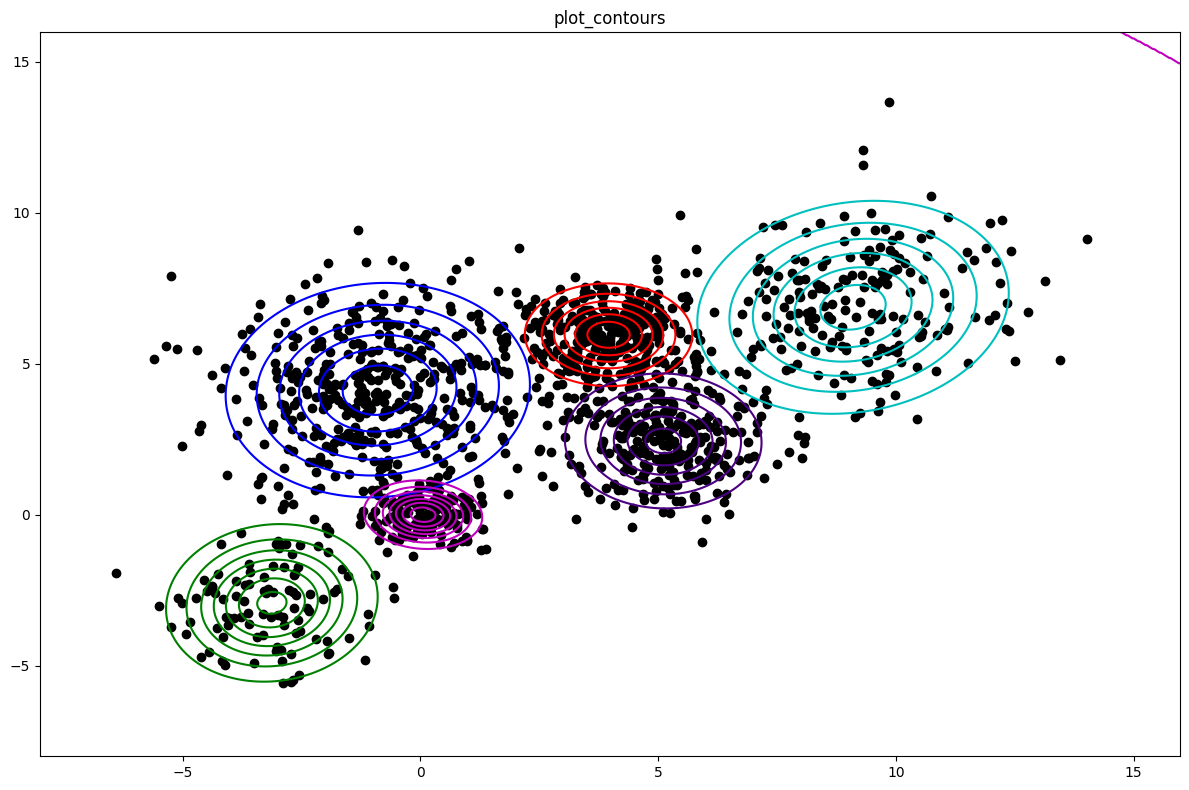

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from plotnine import *
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
%matplotlib inline

def plot_contours(data, means, covs, title):
    """visualize the gaussian components over the data"""
    plt.figure()
    plt.plot(data[:, 0], data[:, 1], 'ko')

    delta = 0.025
    k = means.shape[0]
    x = np.arange(-8.0, 16.0, delta)
    y = np.arange(-8.0, 16.0, delta)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T
    
    col = ['green', 'red', 'indigo','b','c','m','y','k']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
        plt.contour(x_grid, y_grid, z_grid, colors = col[i])

    plt.title(title)
    plt.tight_layout()

def display_cluster(axes,k,z,covariance,labels,X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            axes[k][z].scatter(X[labels==i][0], X[labels==i][1],c = color[i],alpha = alpha,s=s)
            axes[k][z].title.set_text('K = '+str(i+1)+' covariance = '+covariance)

centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)


d = pd.DataFrame(Multi_blob_Data)
covariance =['full', 'tied', 'diag', 'spherical']
labels = []
gmm=[]
for q in range(0,4):

    for j in range(1,18):

        gmm.append(GaussianMixture(n_components = j,covariance_type=covariance[q]))
        gmm[j-1]=gmm[j-1].fit(d)
        labels.append(gmm[j-1].predict(d))

    k=0
    z=0

    f = plt.figure(q)
    f, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey = True)
    plt.rcParams['figure.figsize'] = [12, 8]

    for j in range(1,7):

        display_cluster(axes,k,z,covariance[q],labels[j-1],d,gmm[j-1],num_clusters=j)

        if j == 3:
            k=k+1
            z=0
        else:
            z=z+1
        

    k=0
    z=0
for h in [0,1,2,3,4,5]:
    plt.figure(h+5)
    plot_contours(Multi_blob_Data, gmm[h].means_, gmm[h].covariances_, 'plot_contours')

## iris data set

GMM

<Figure size 1200x800 with 0 Axes>

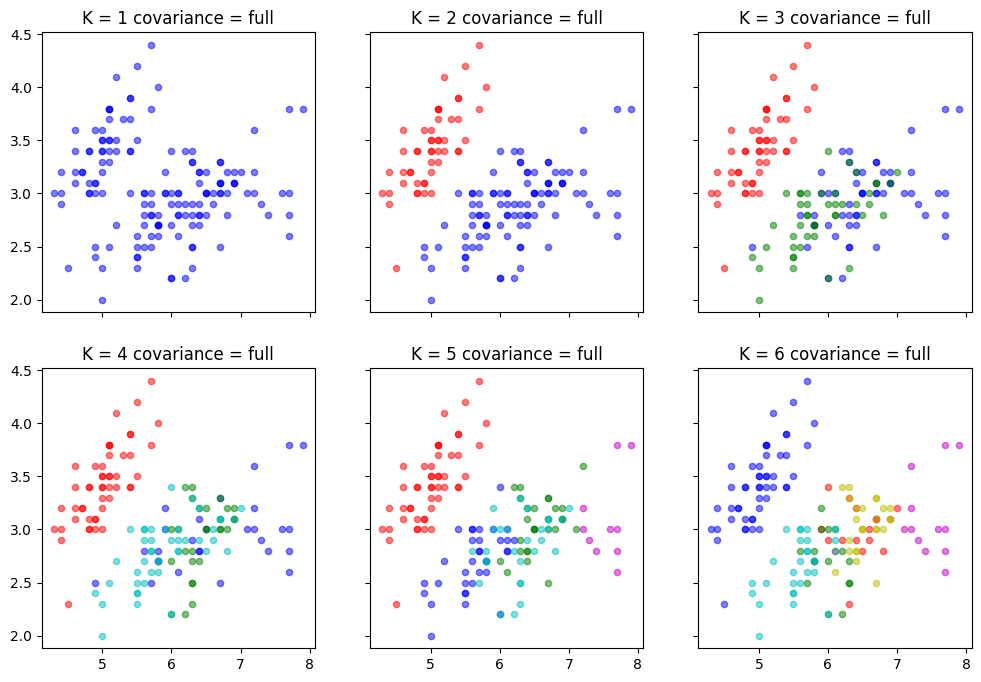

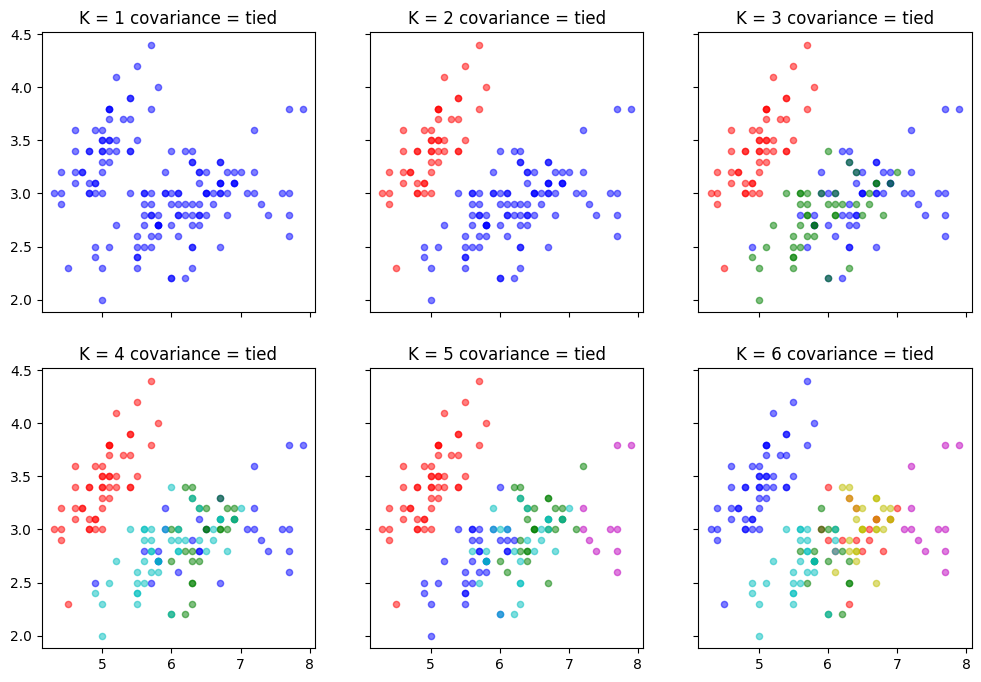

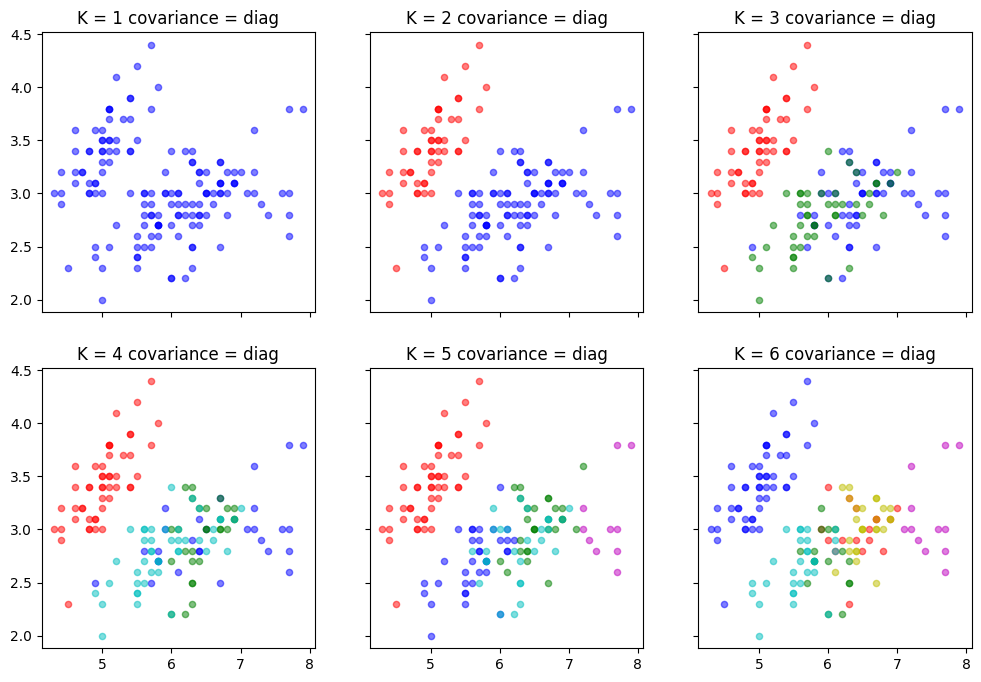

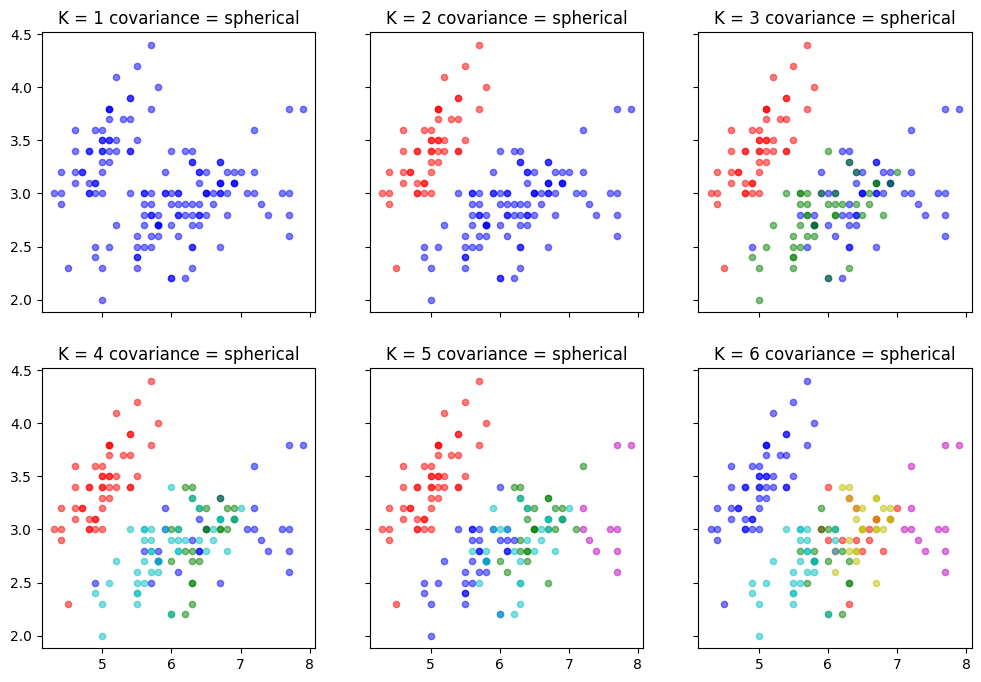

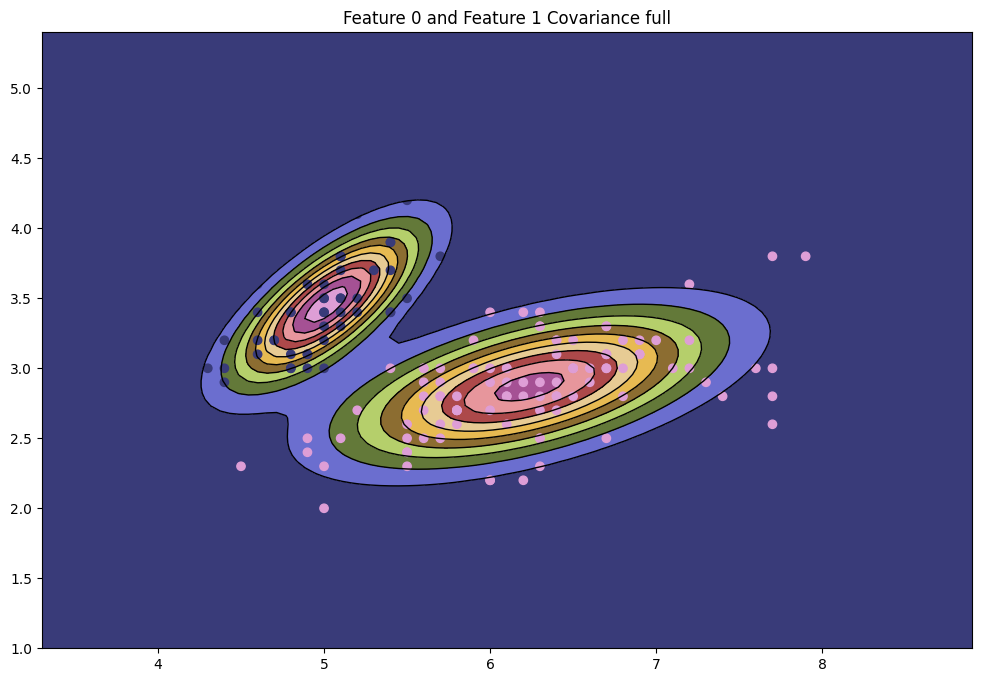

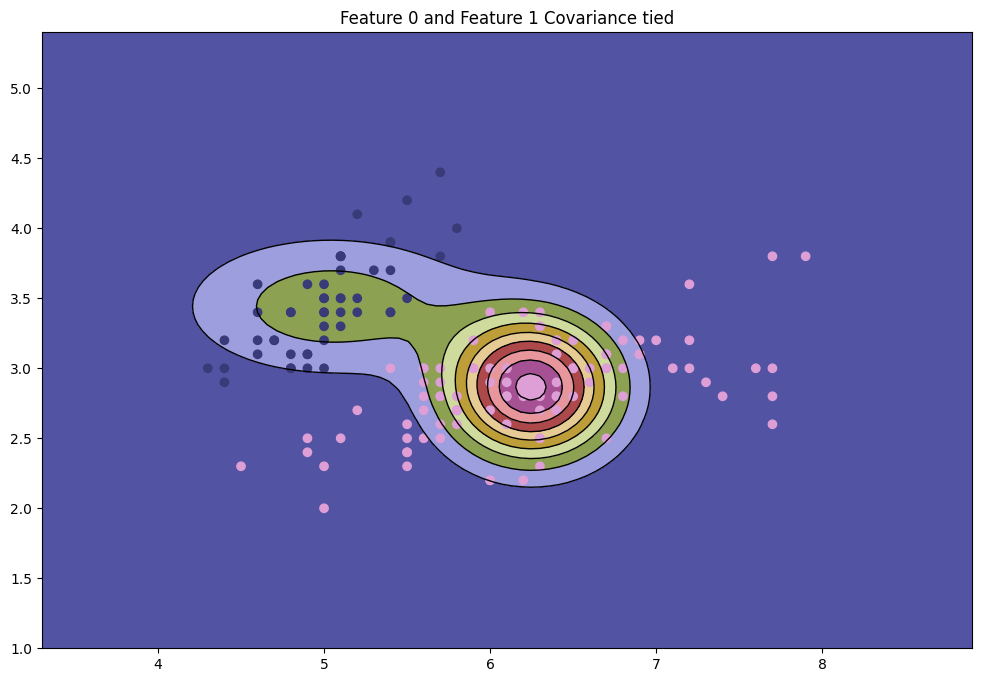

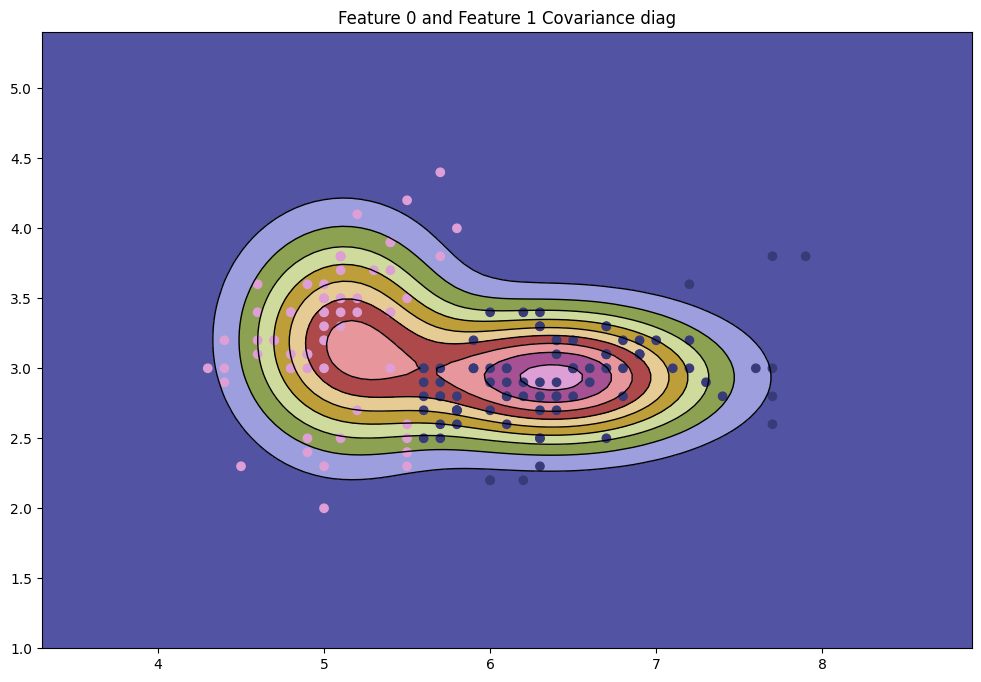

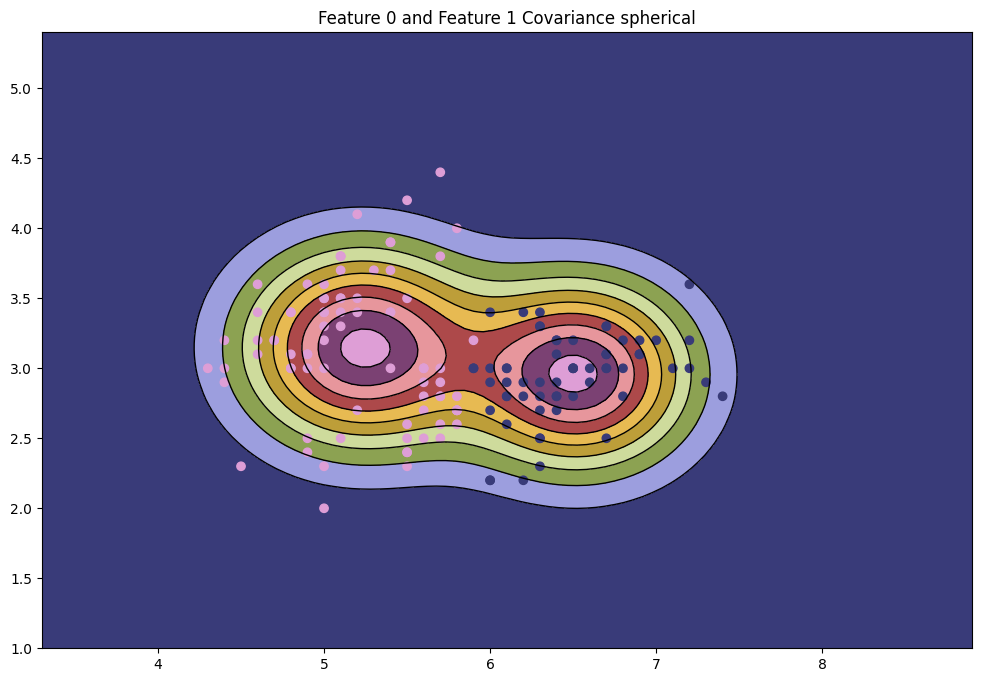

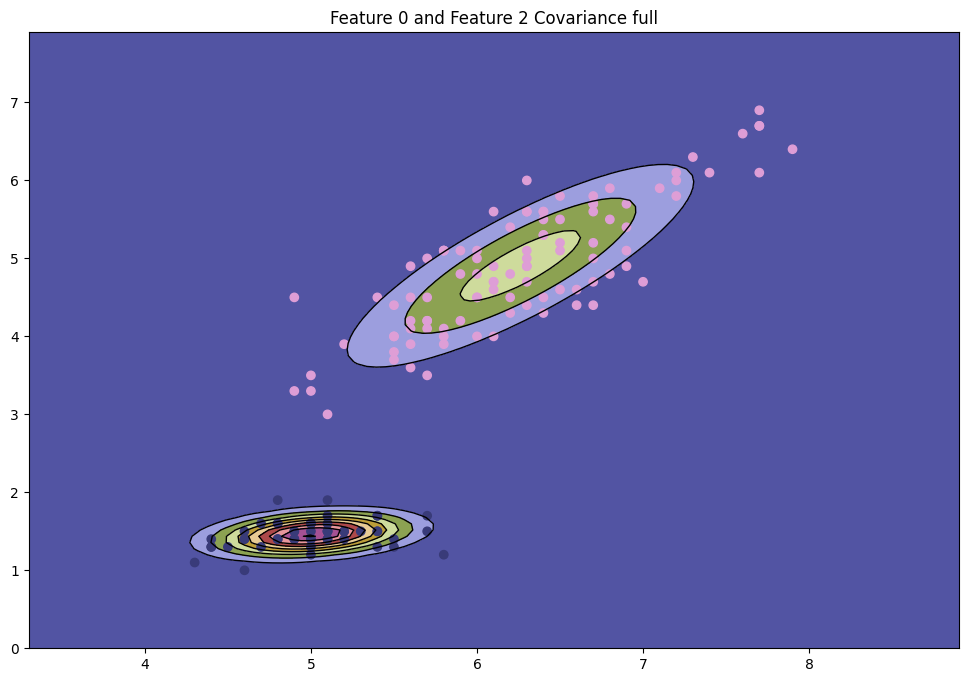

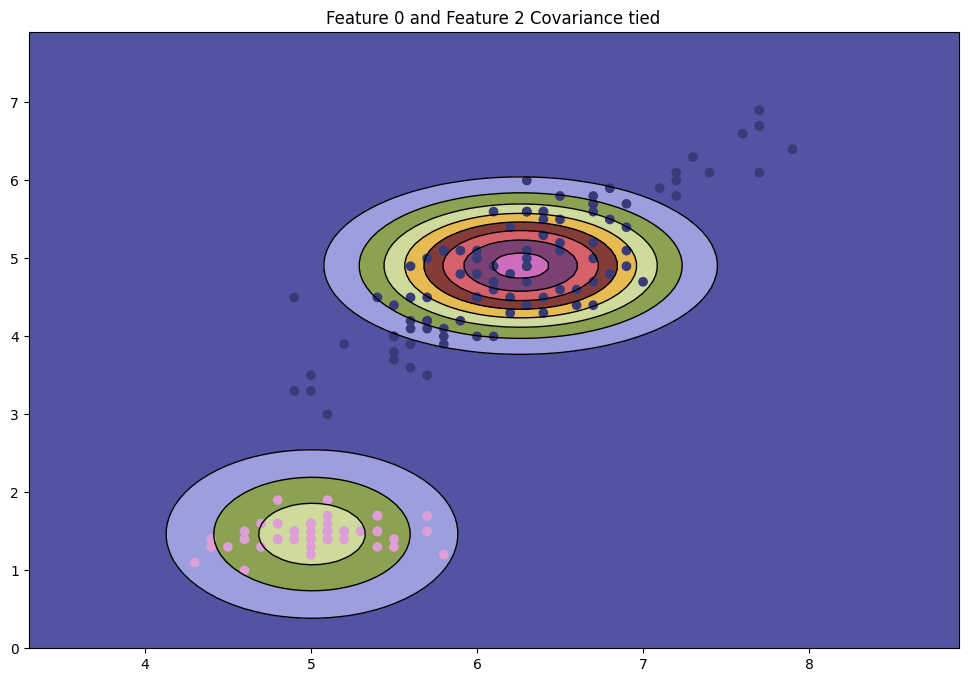

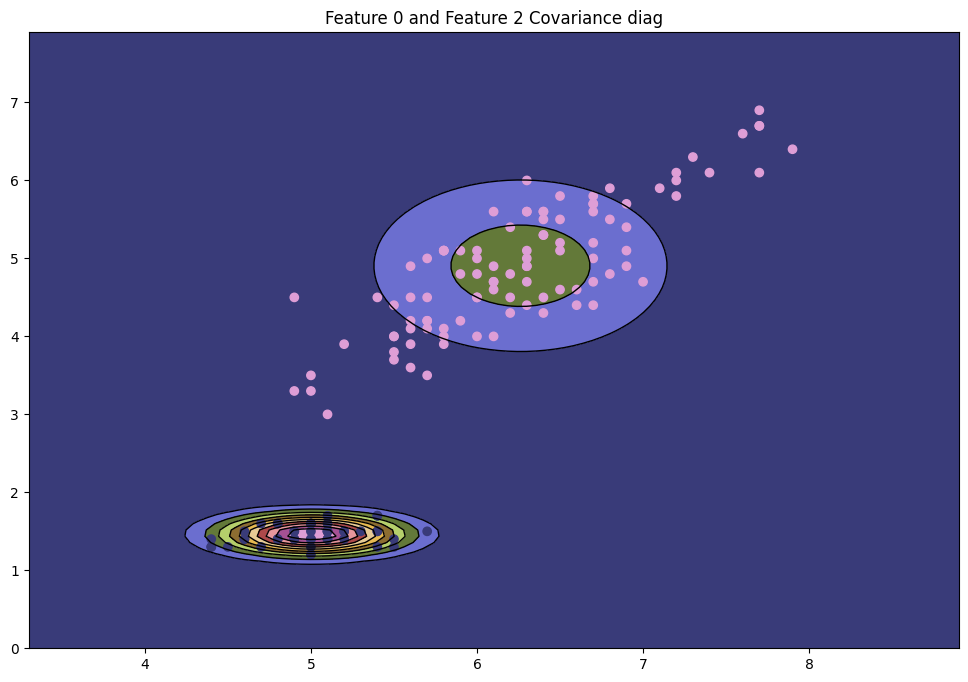

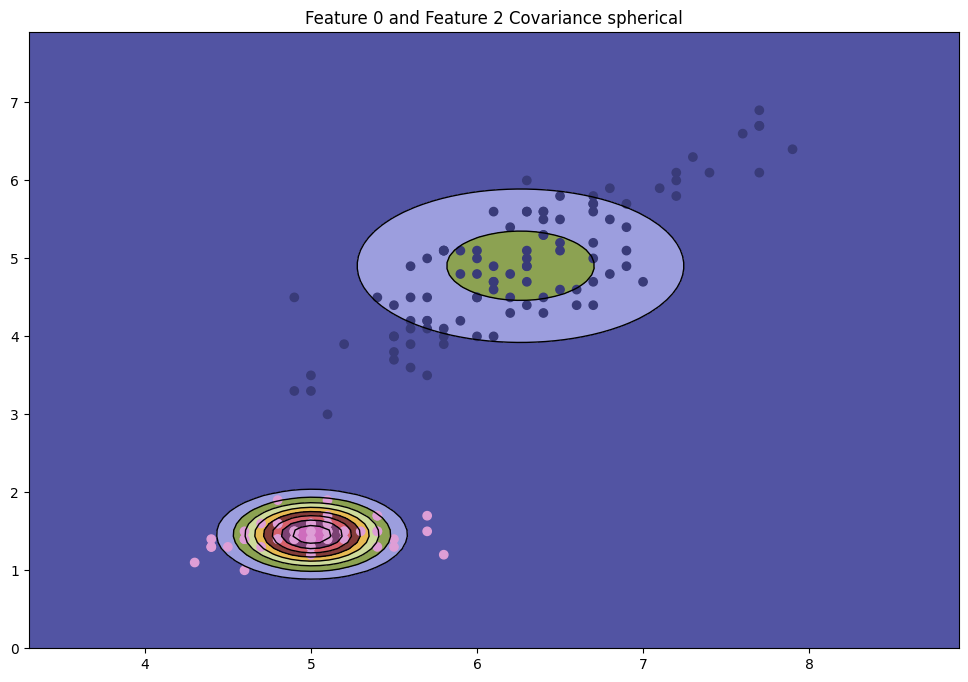

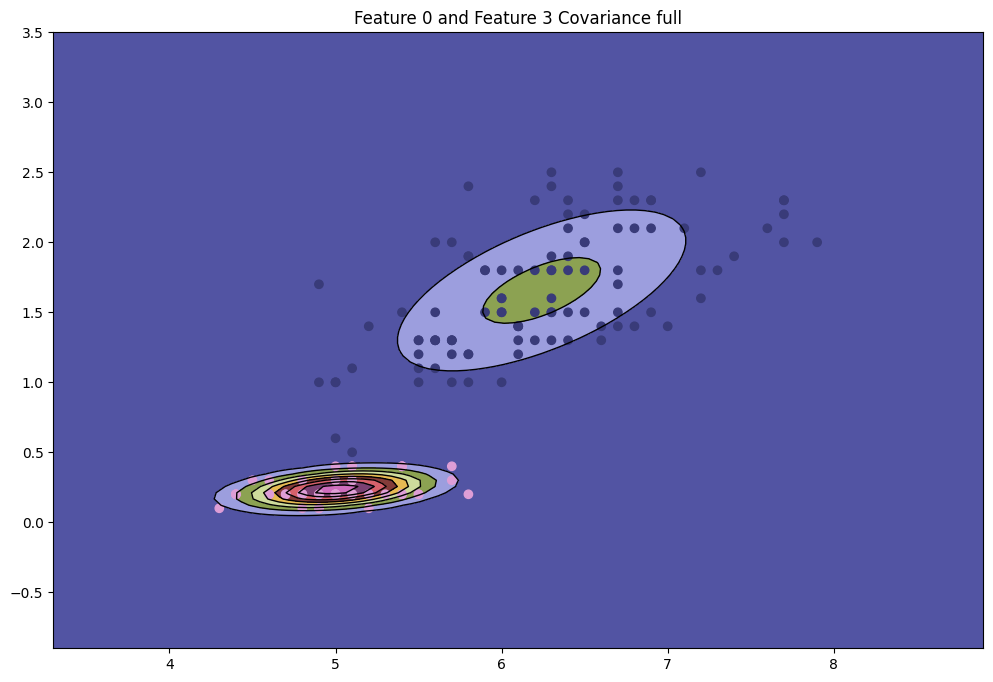

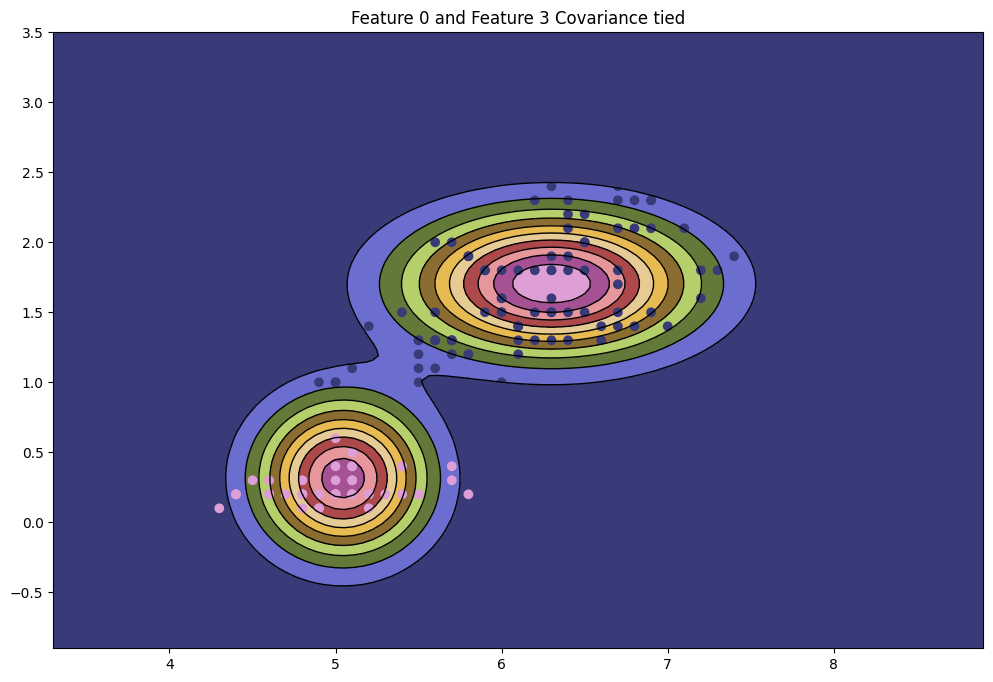

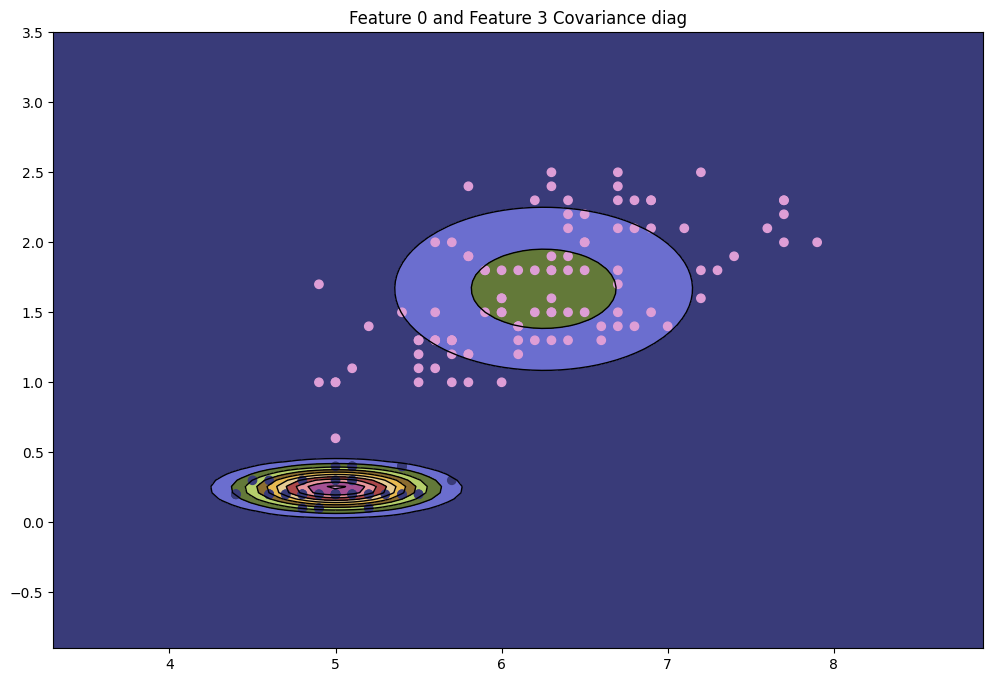

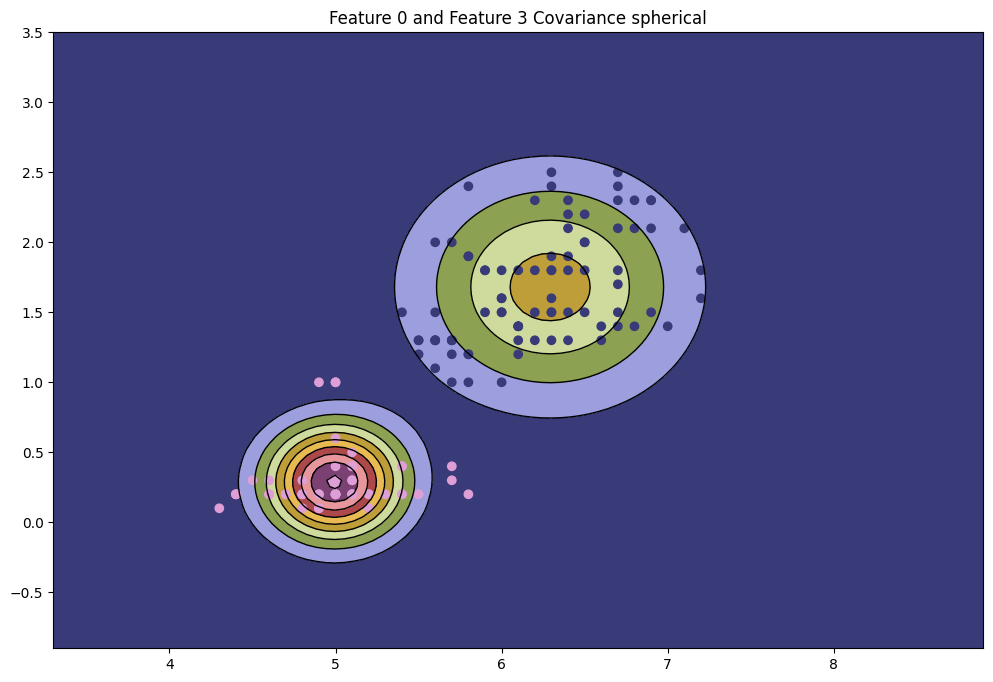

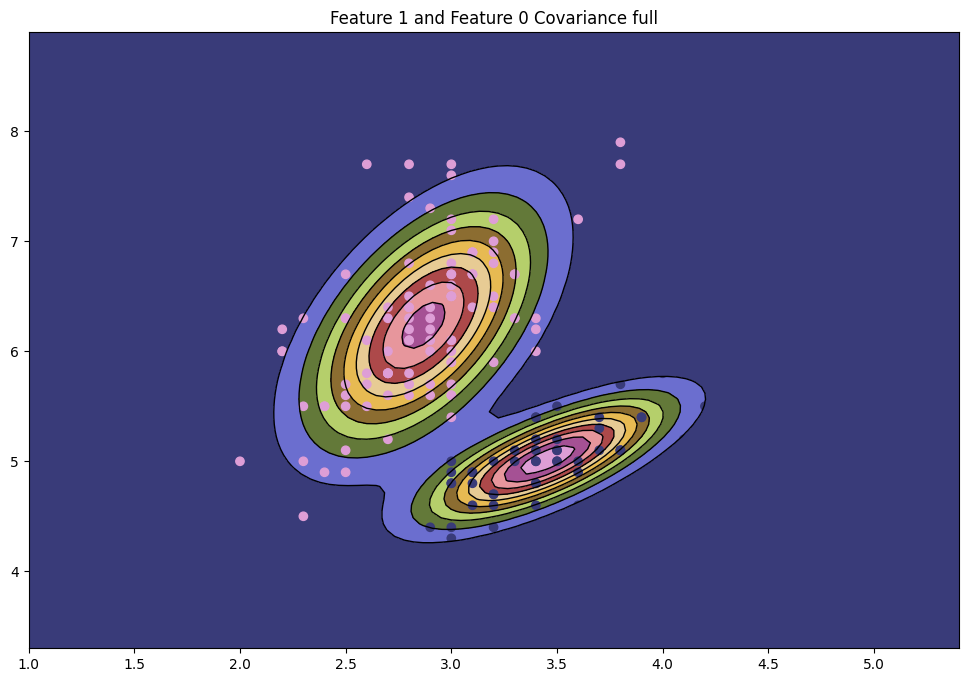

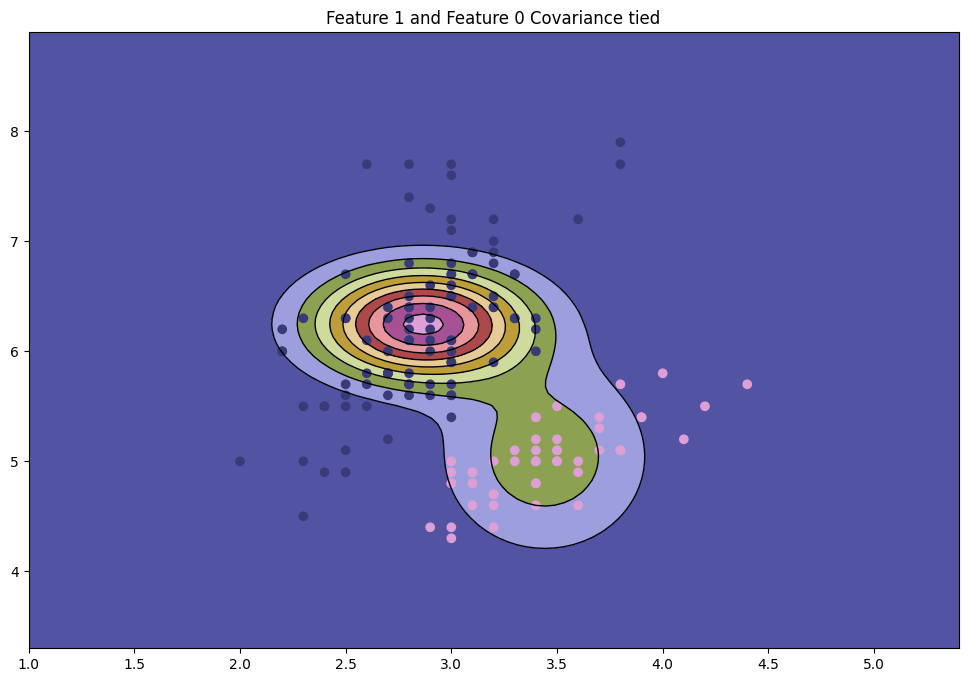

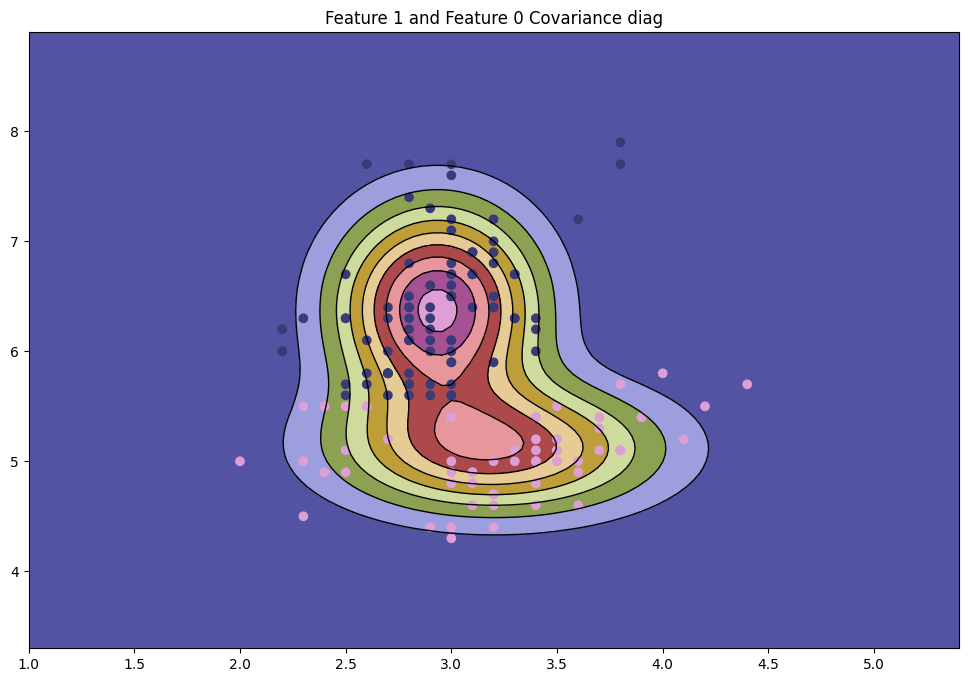

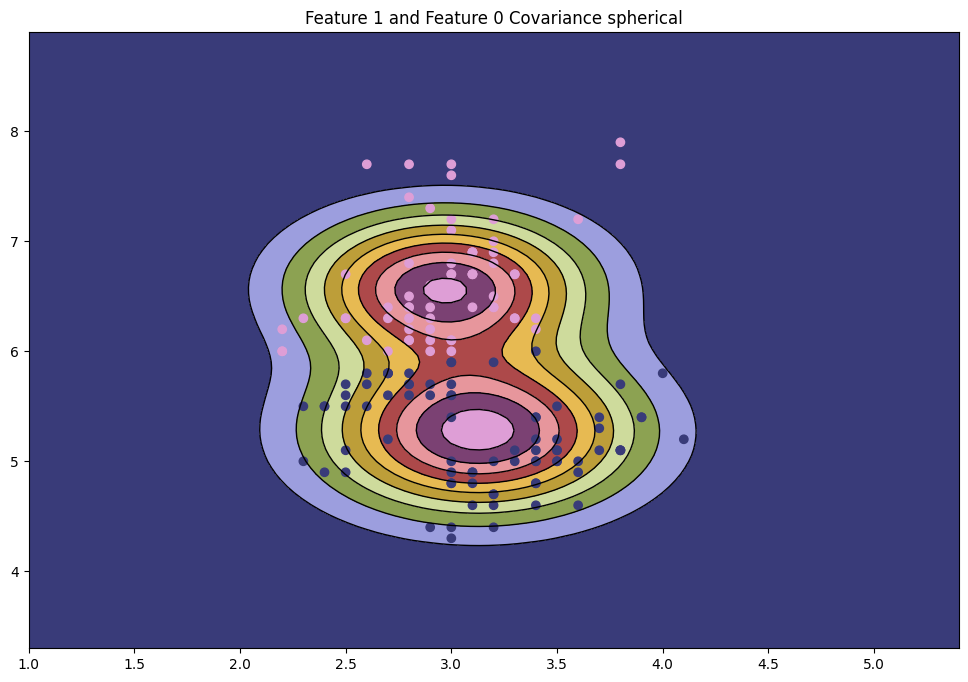

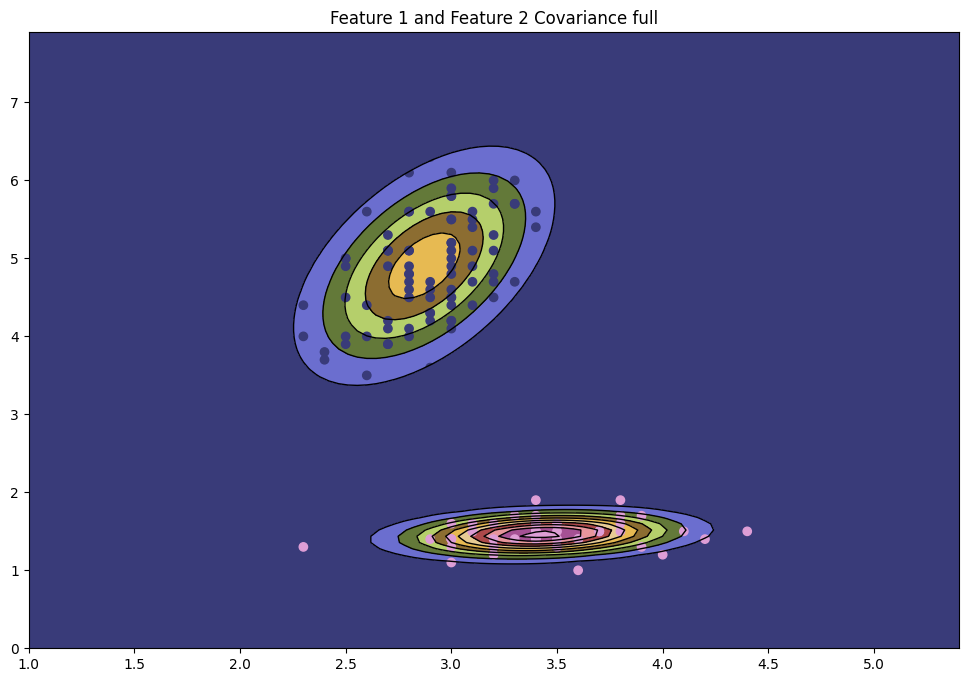

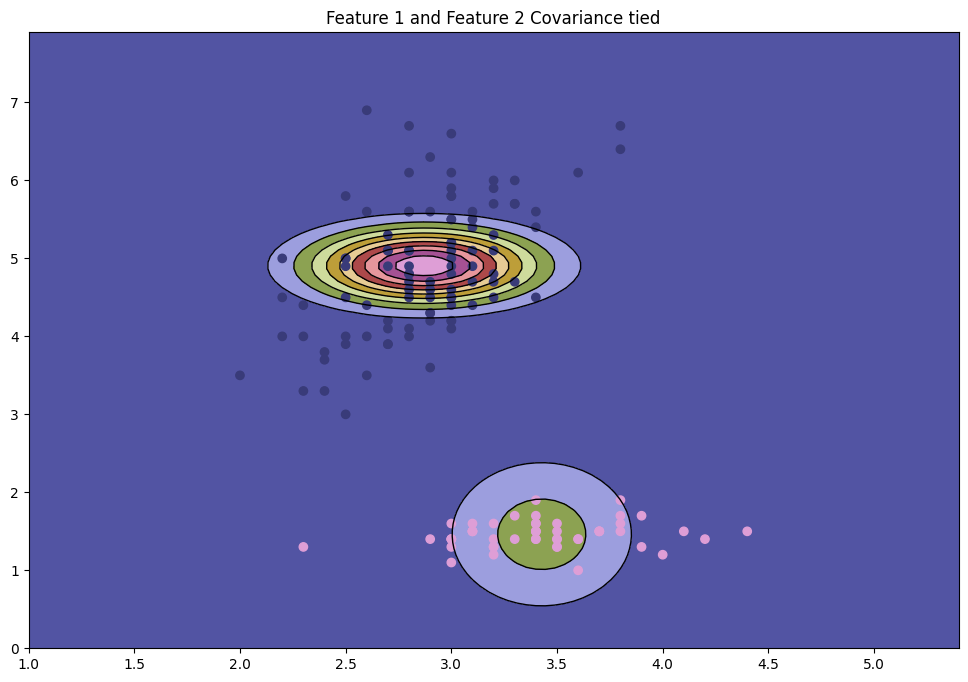

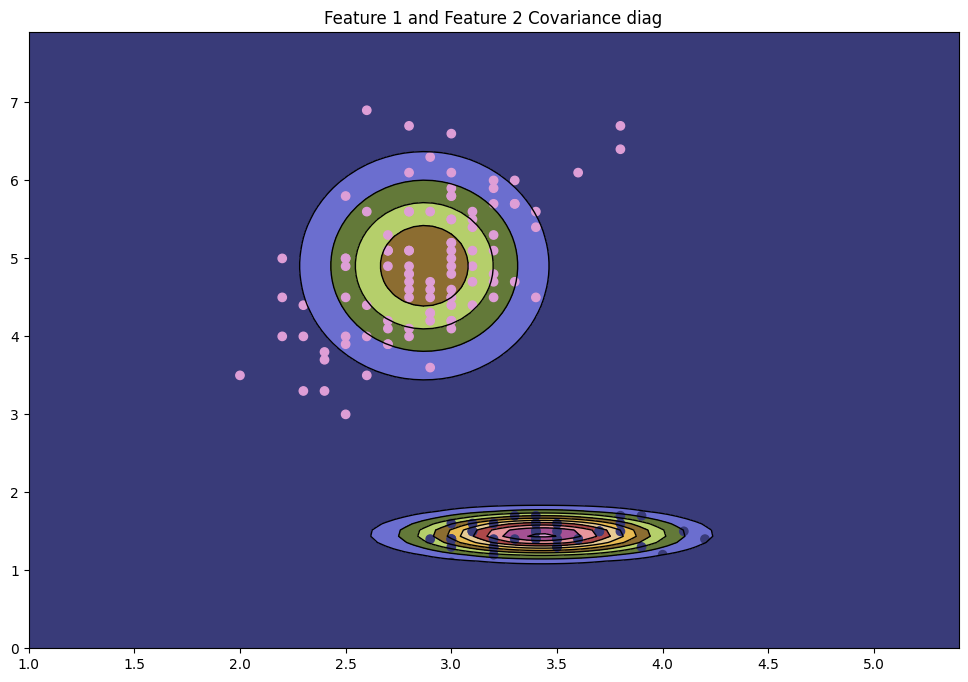

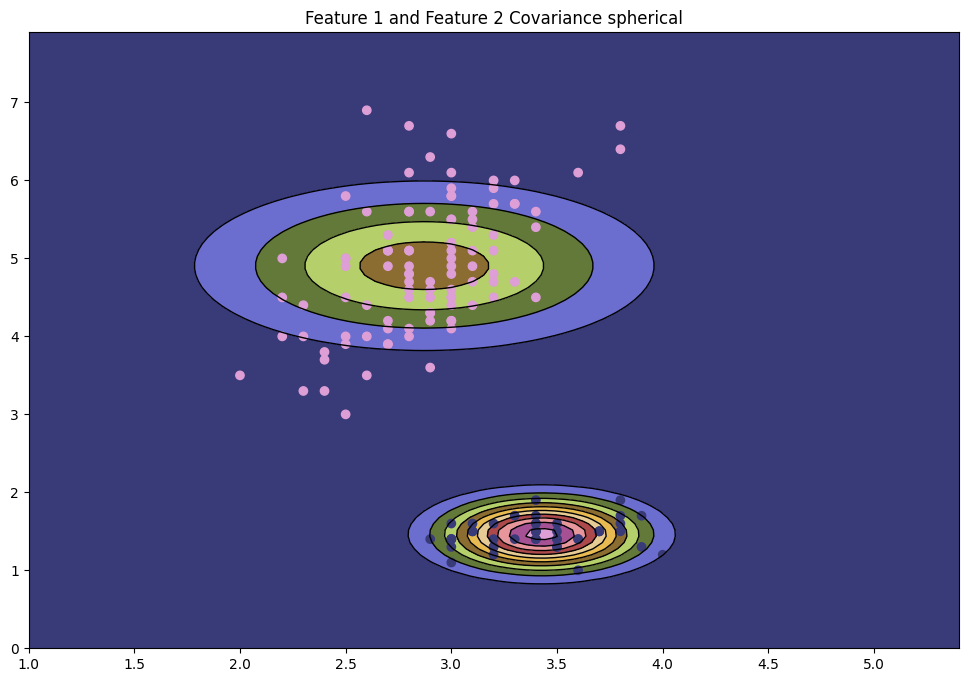

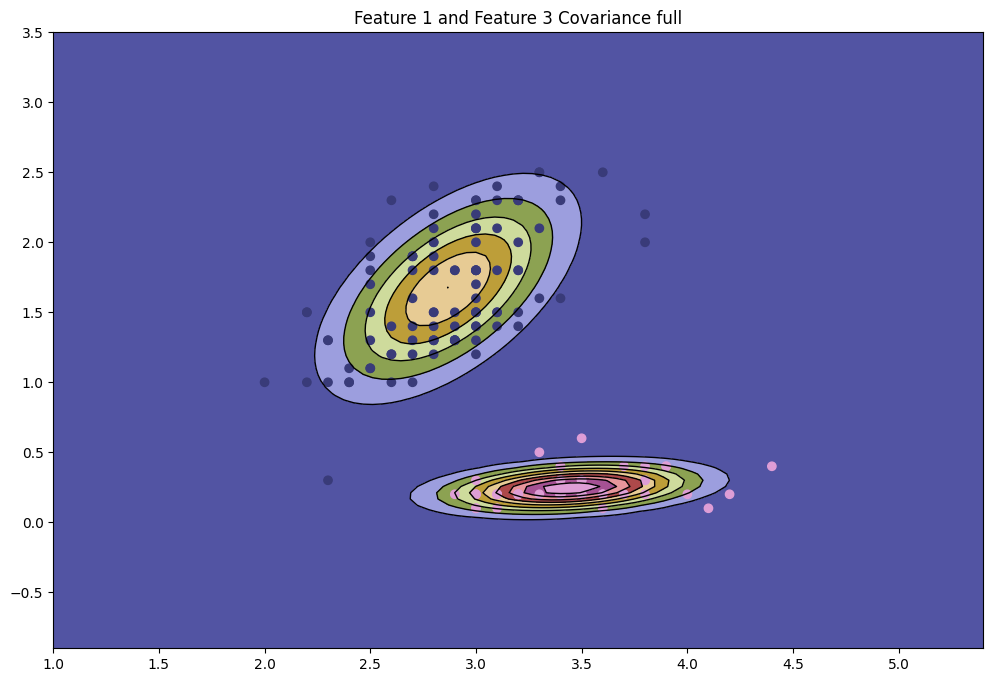

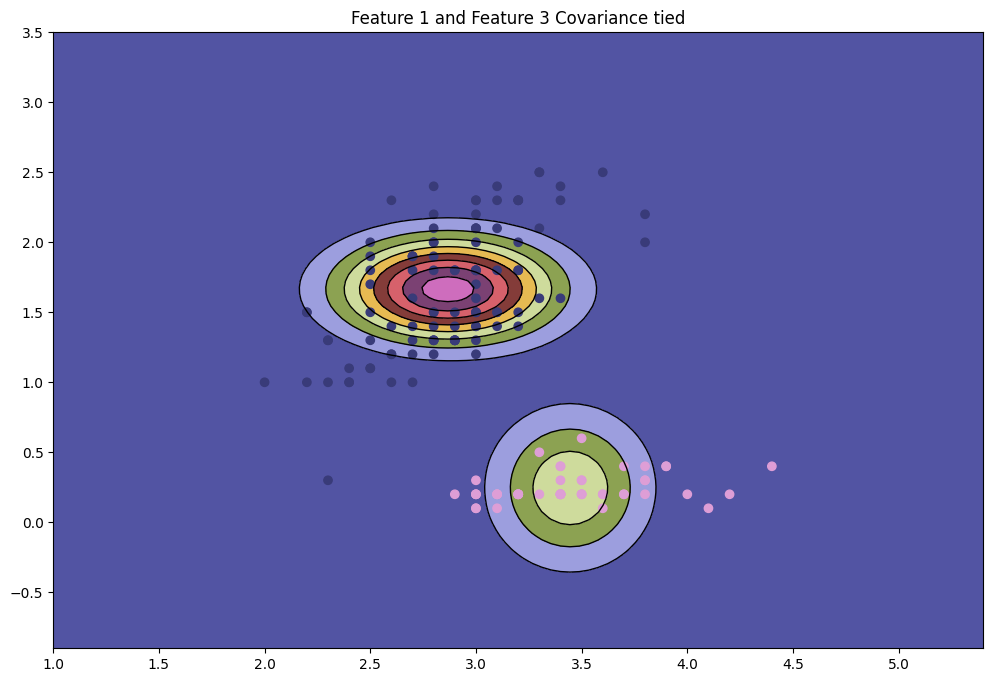

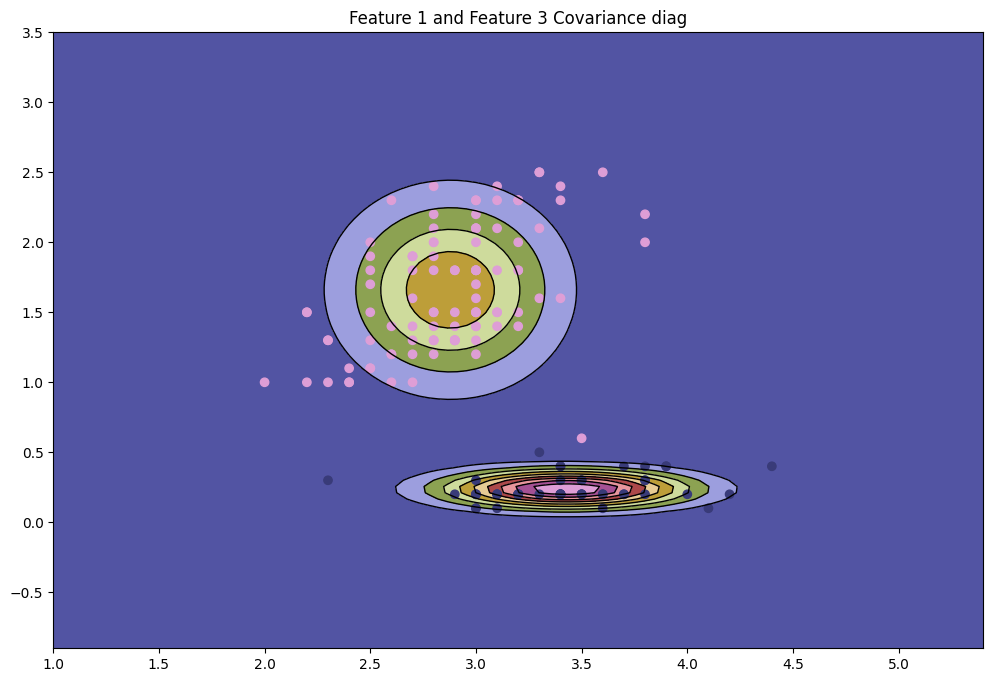

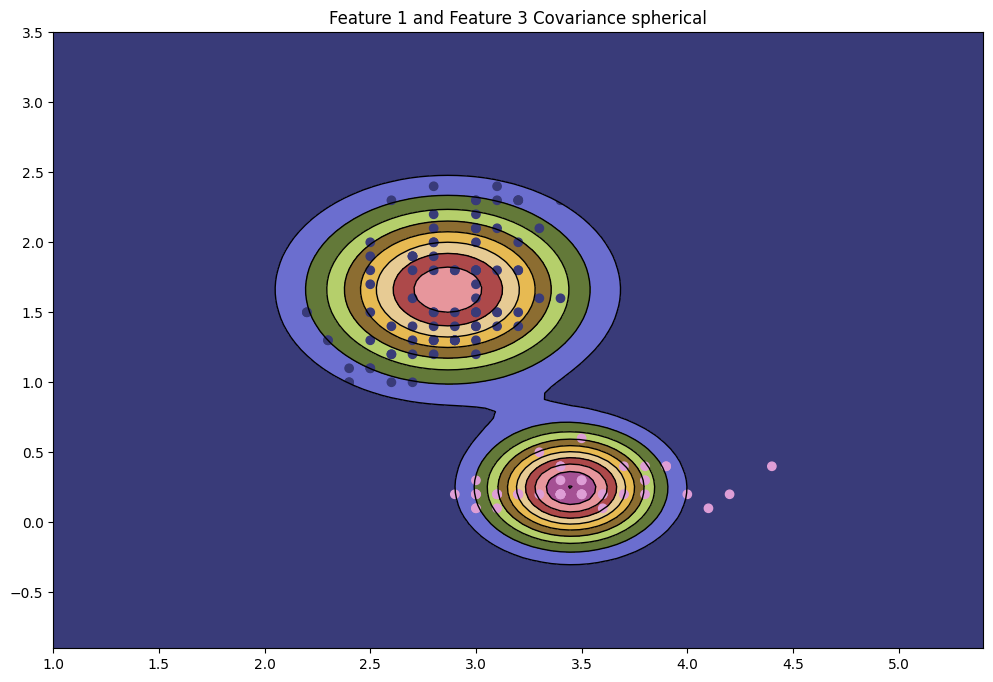

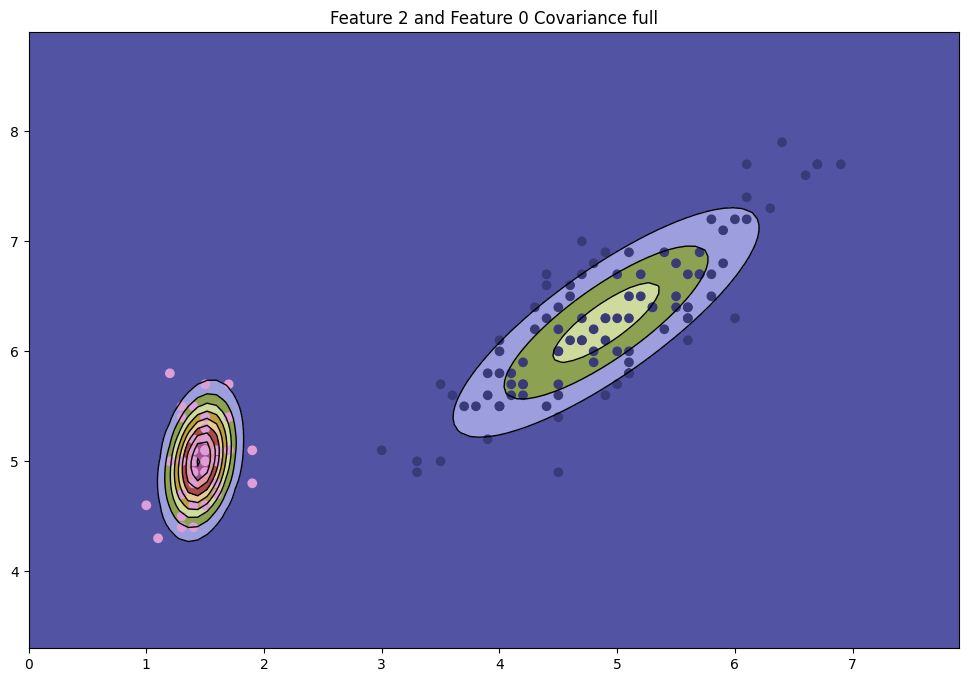

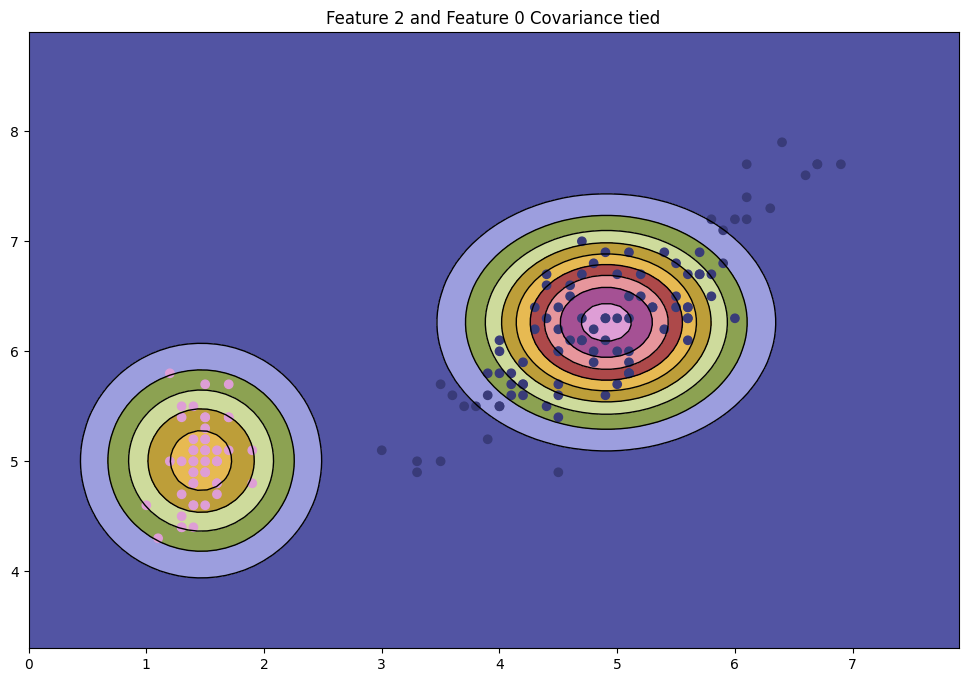

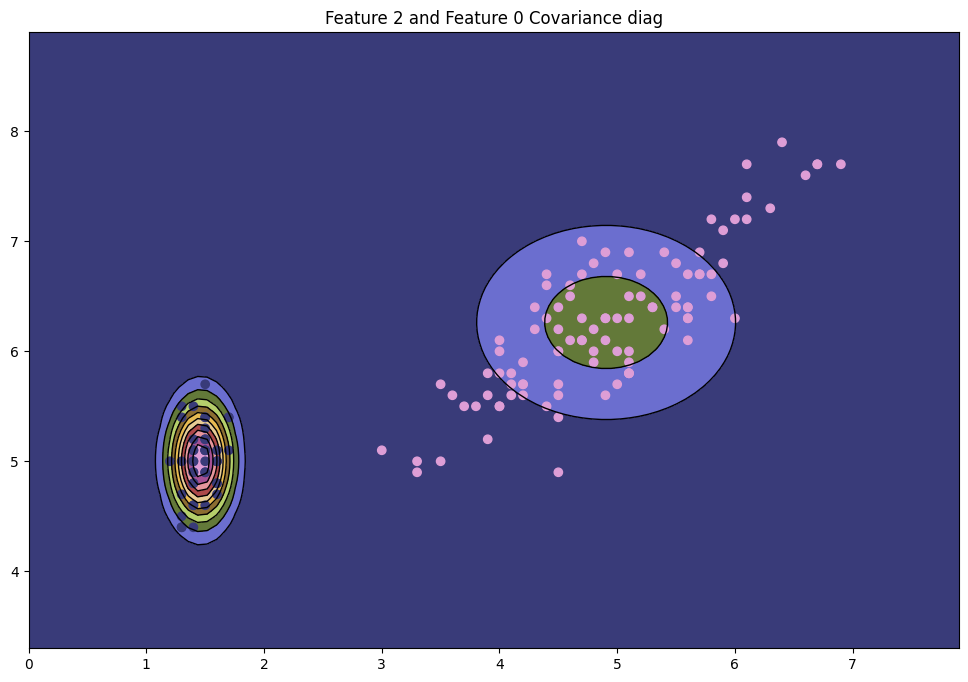

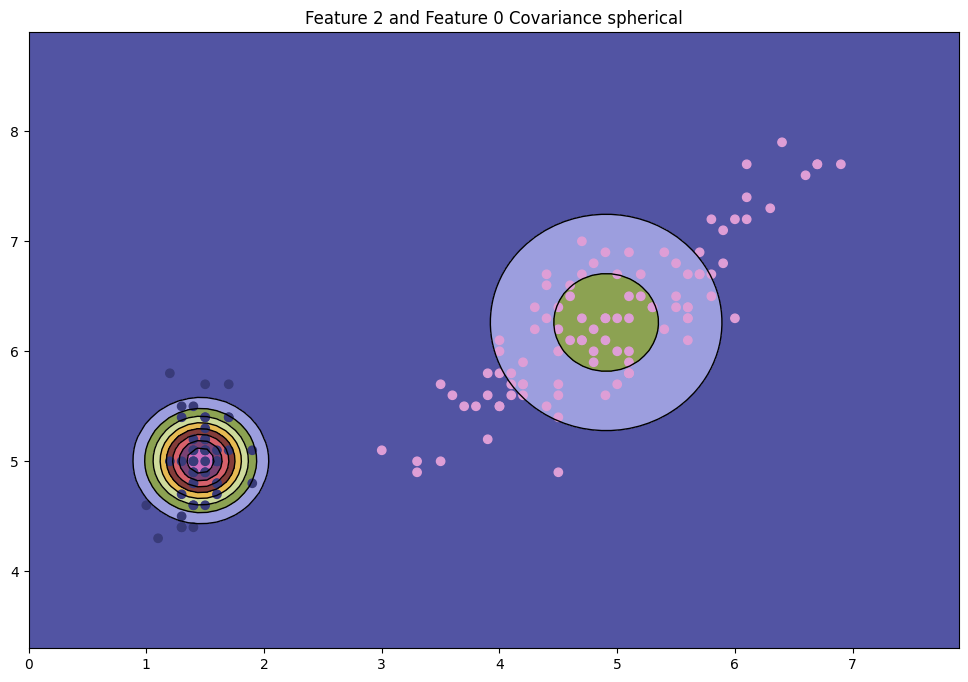

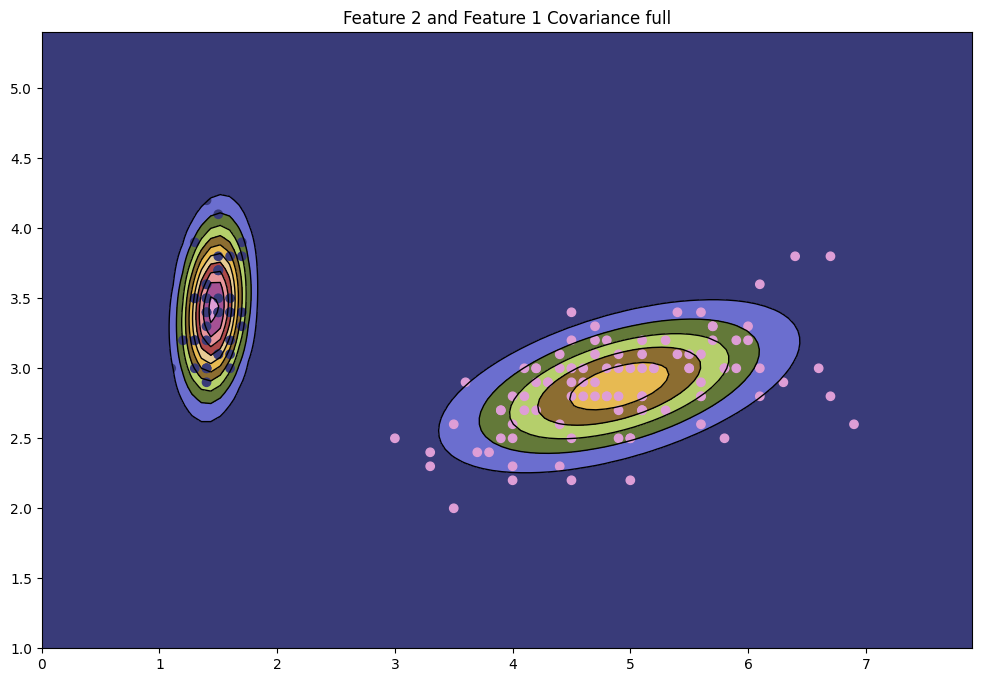

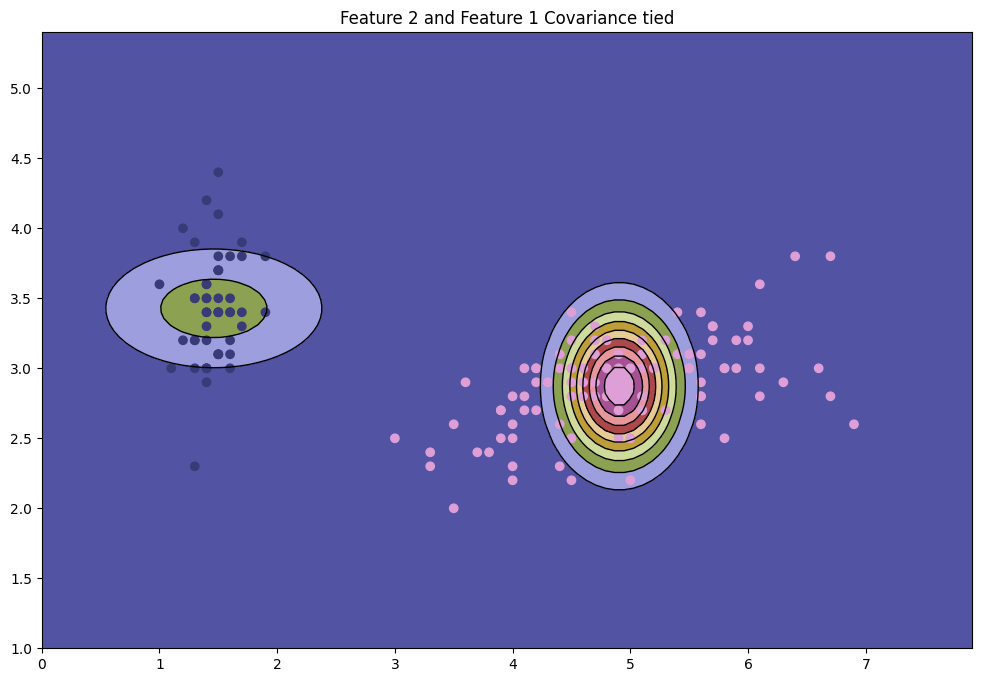

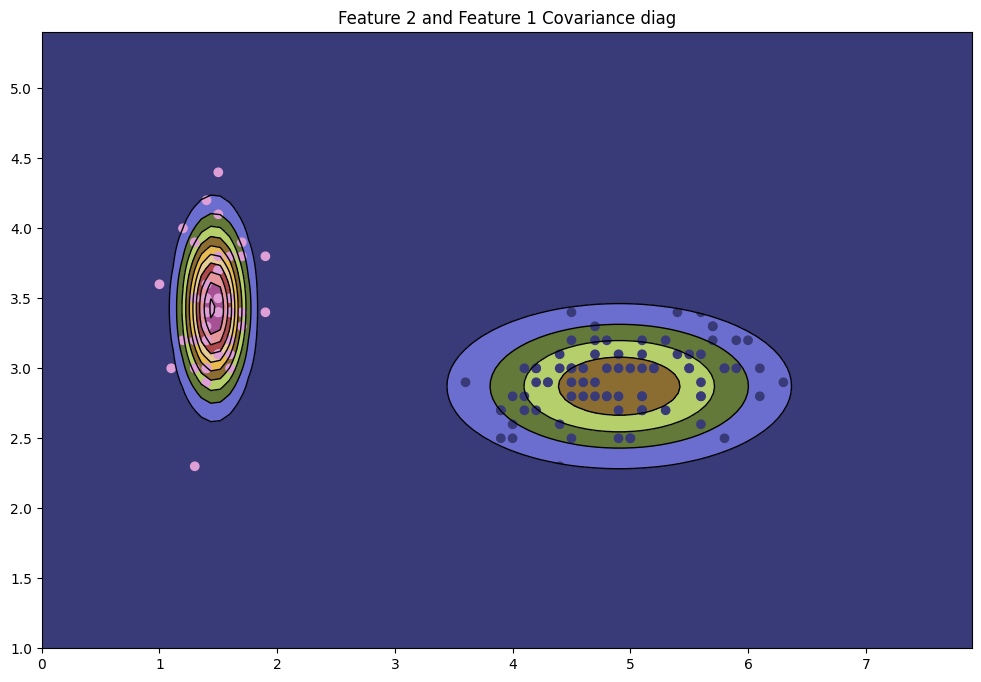

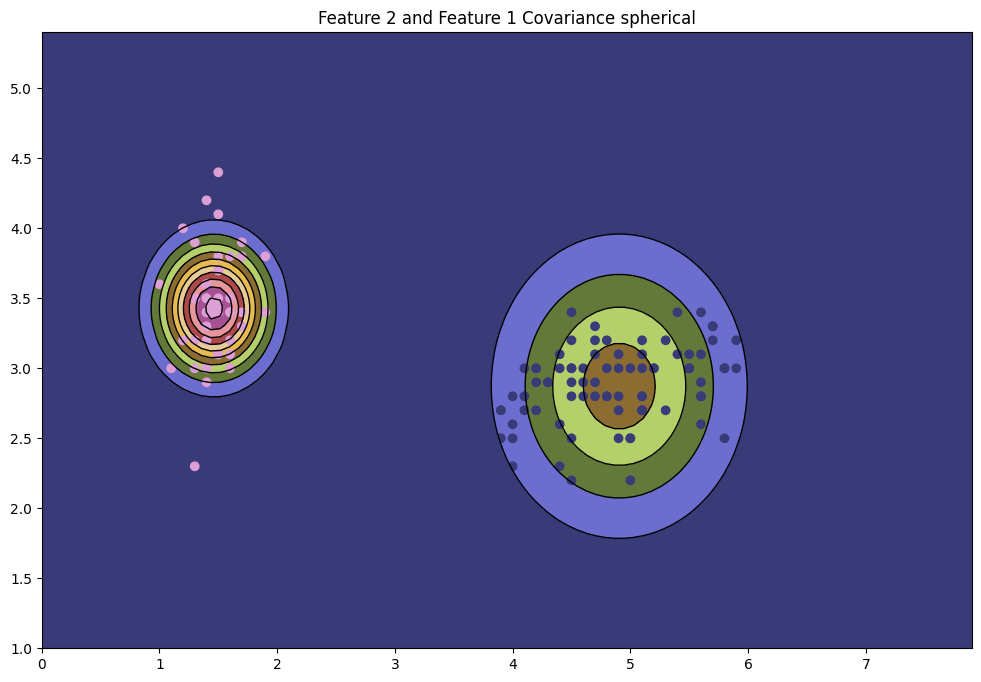

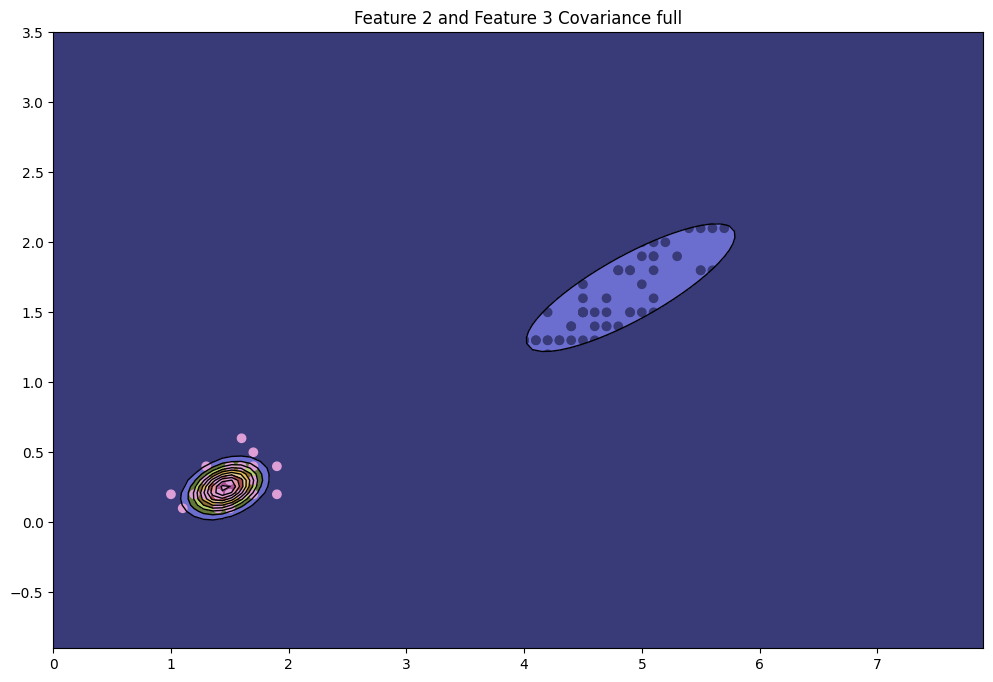

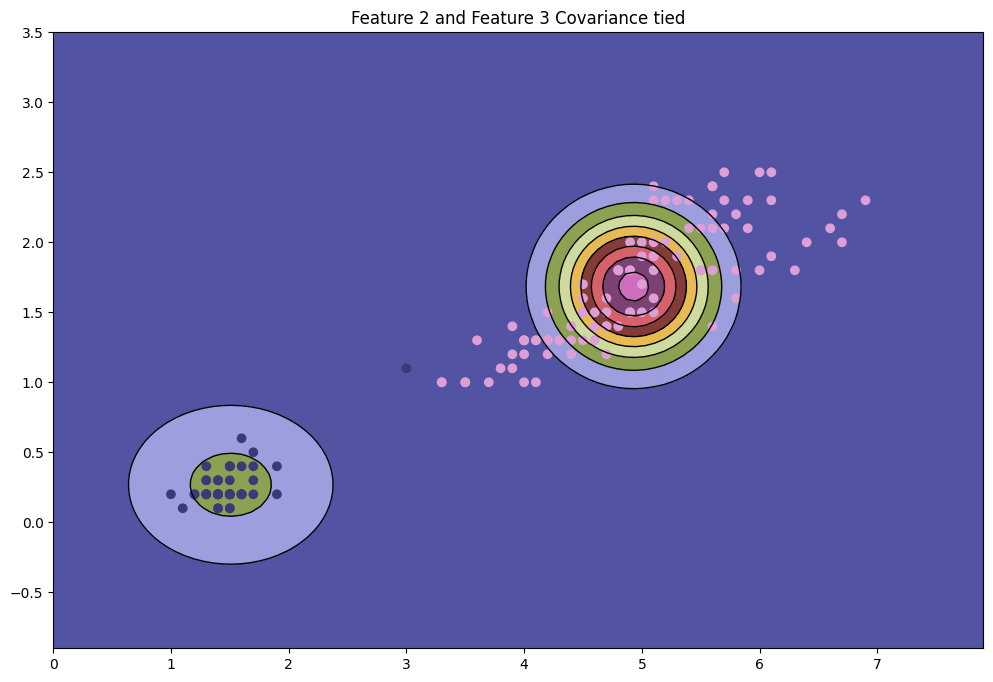

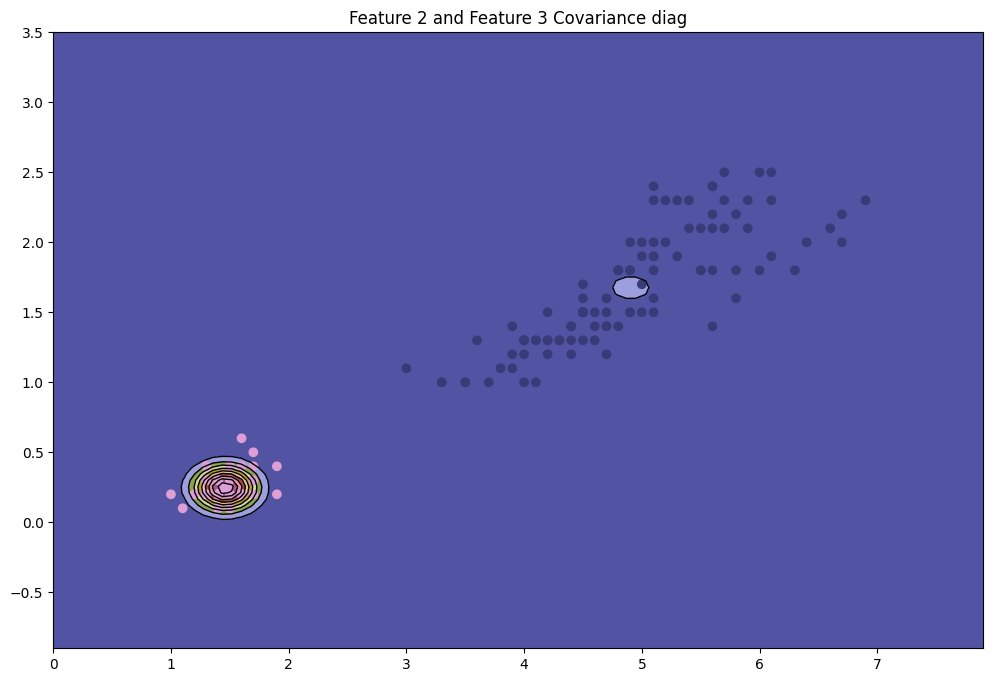

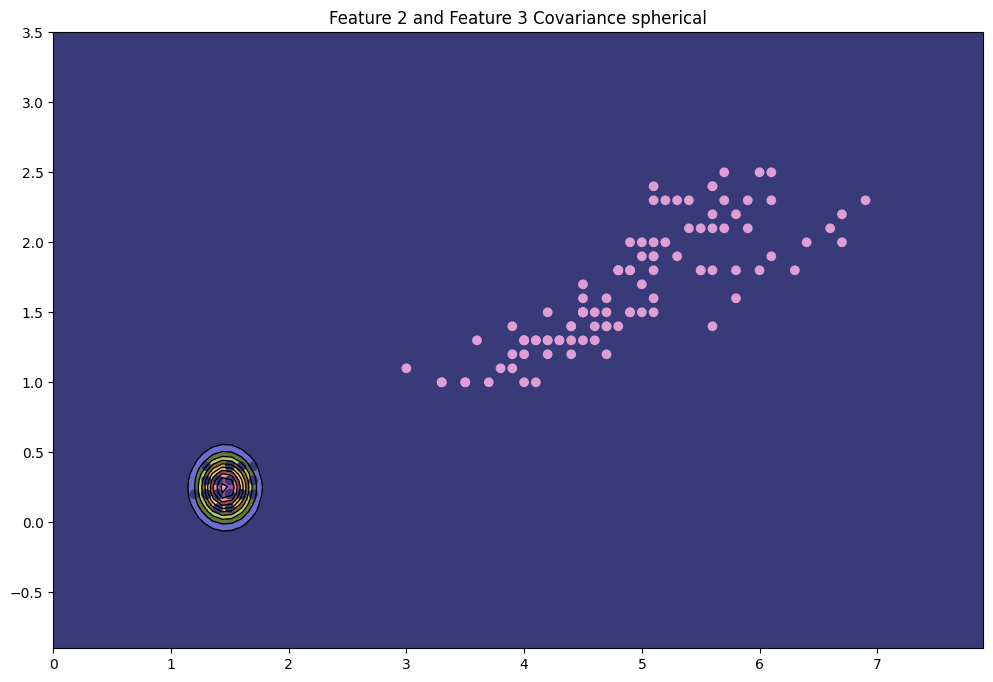

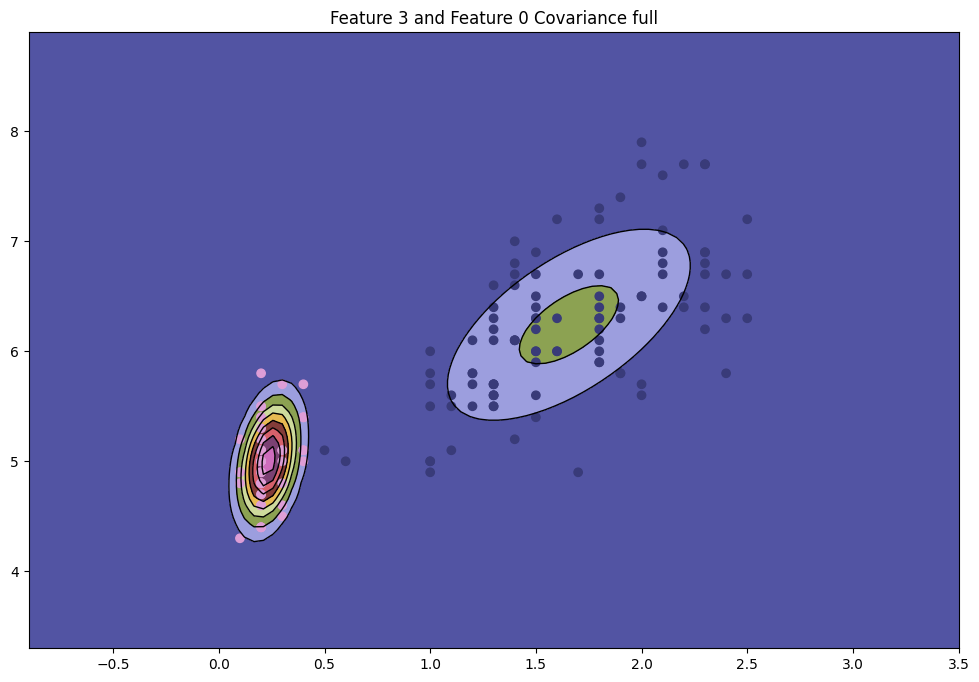

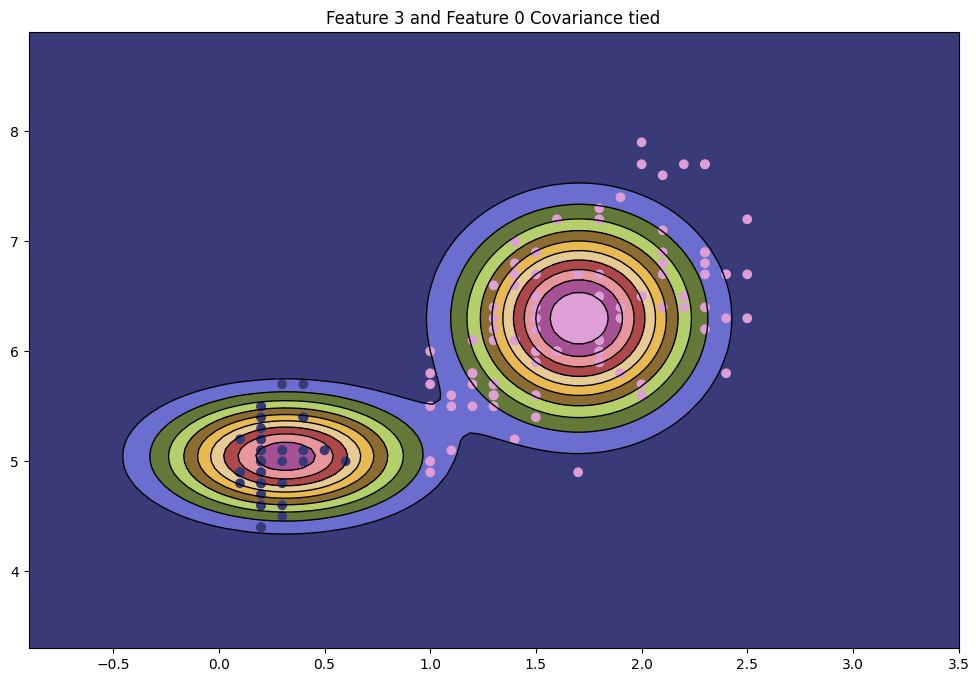

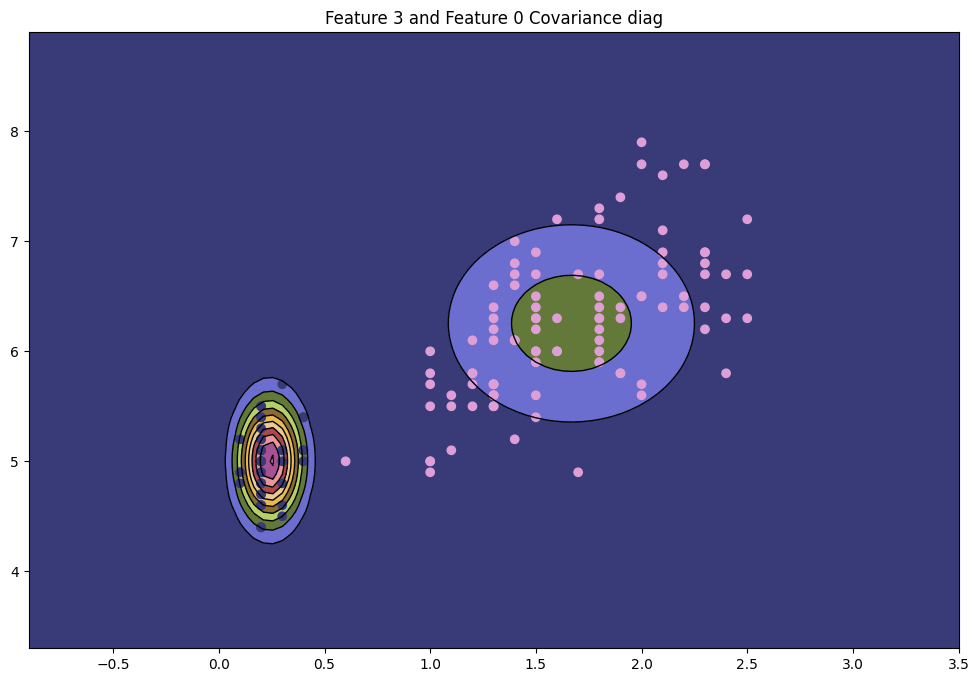

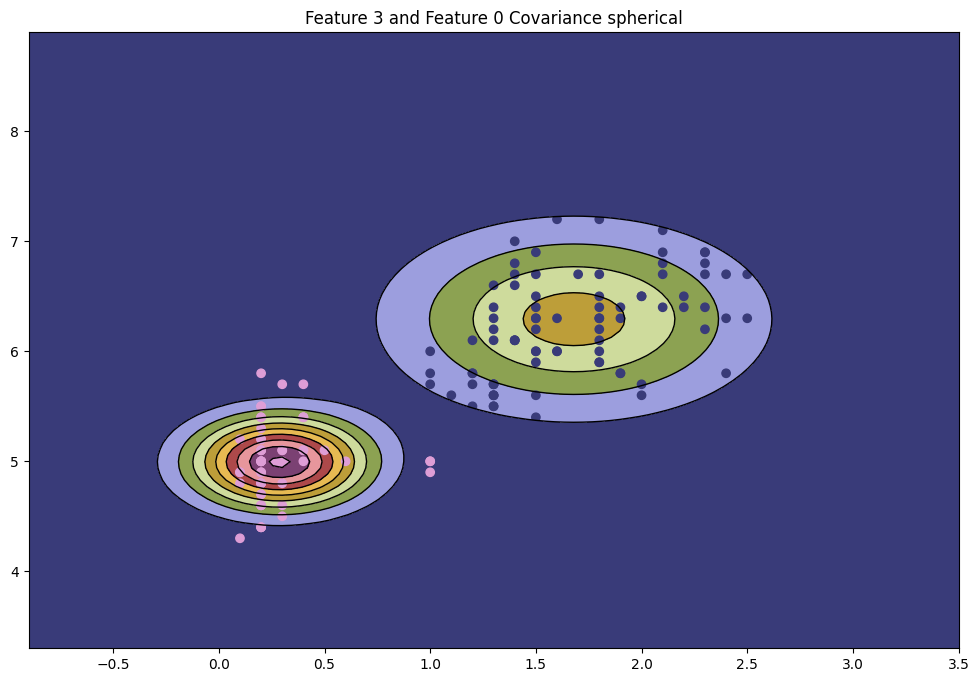

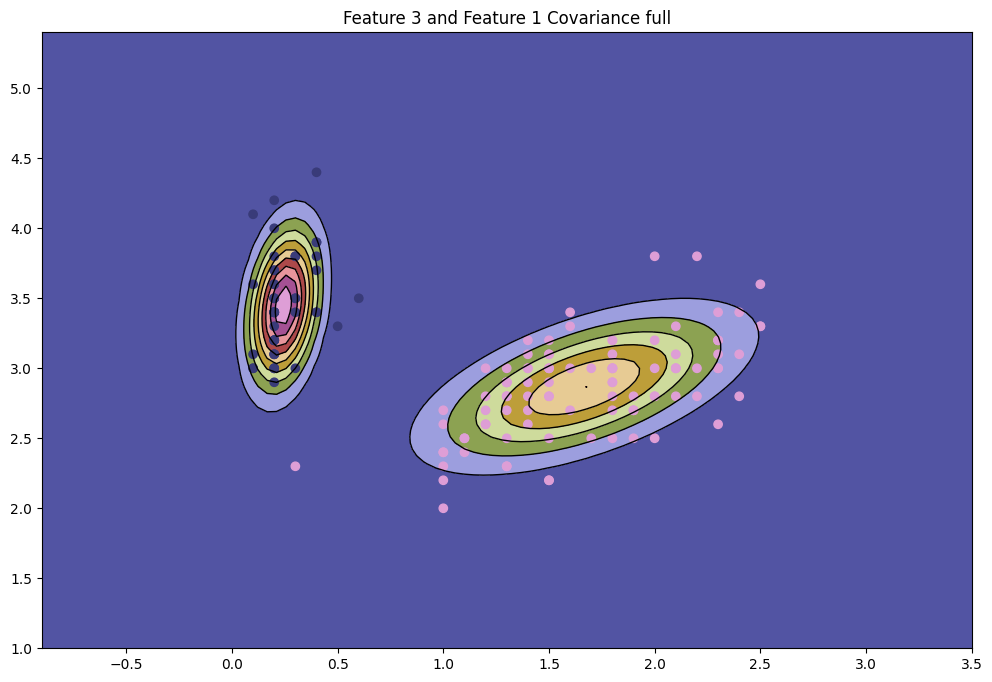

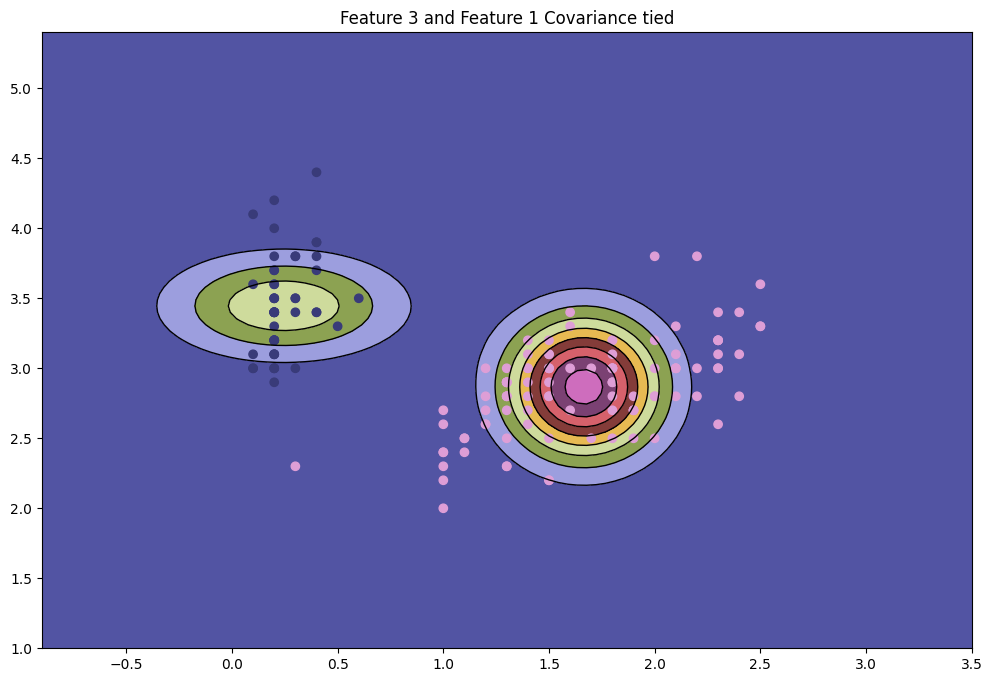

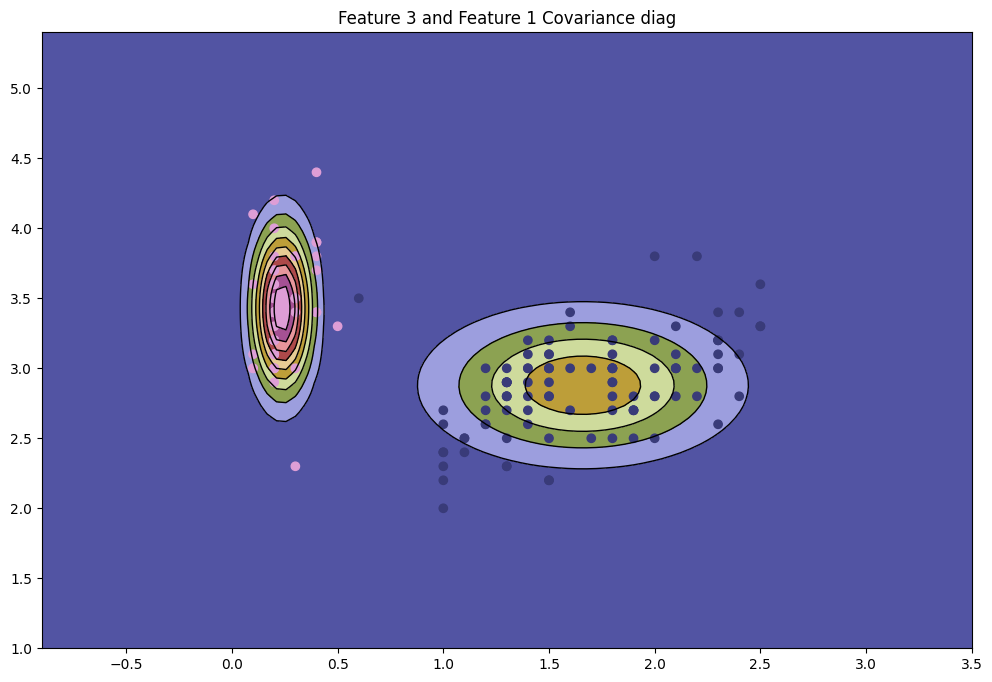

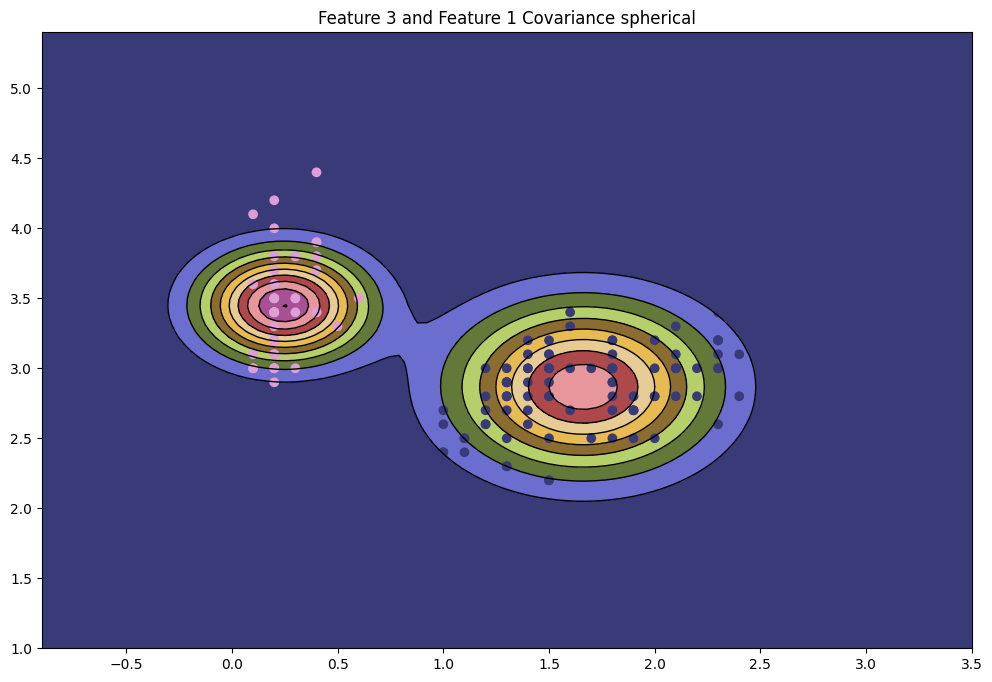

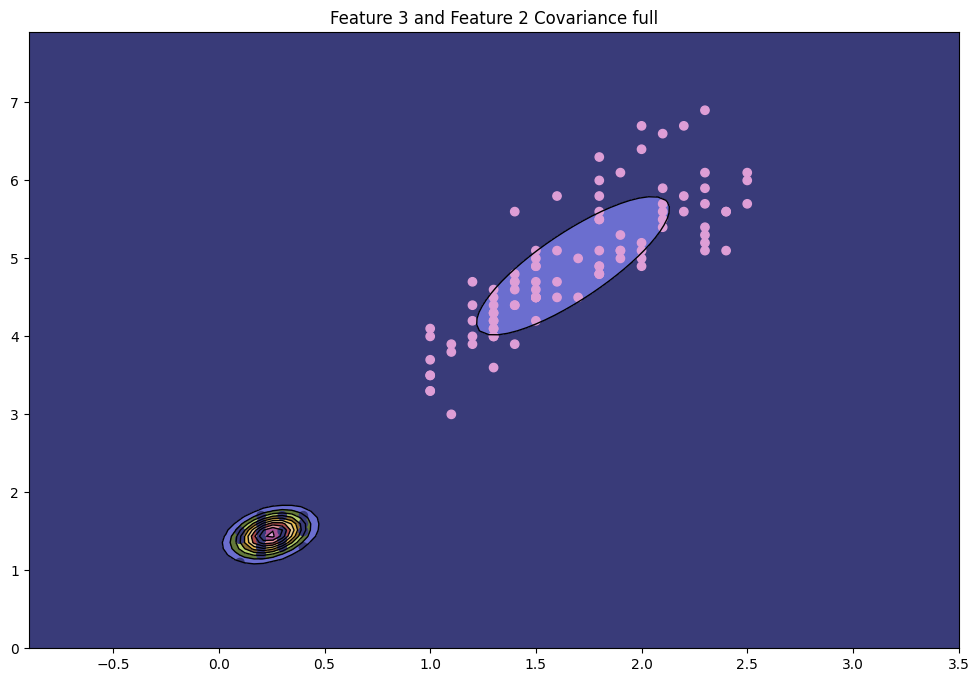

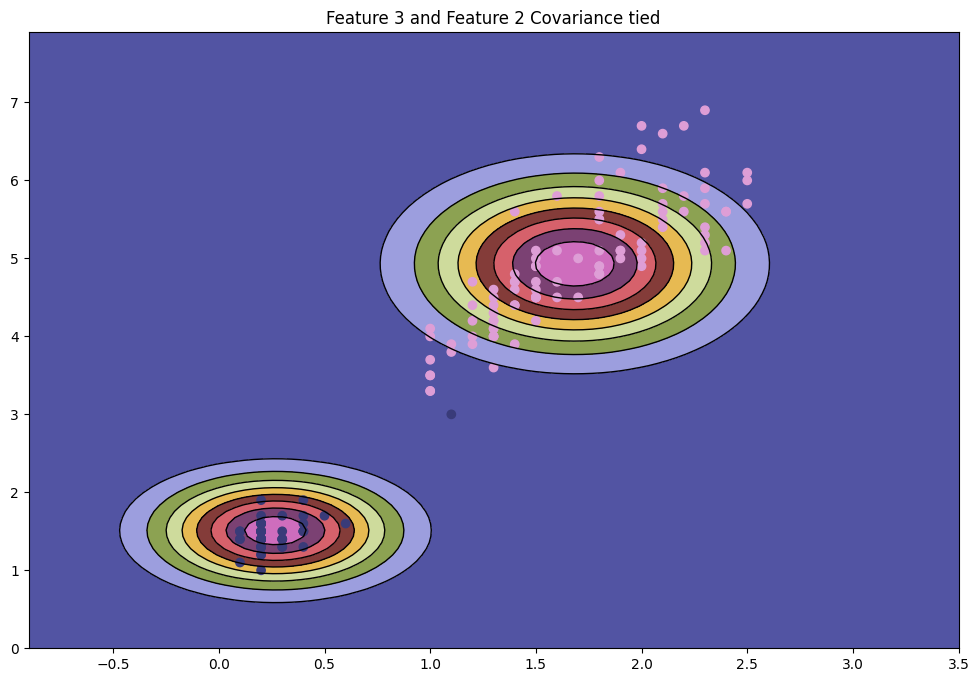

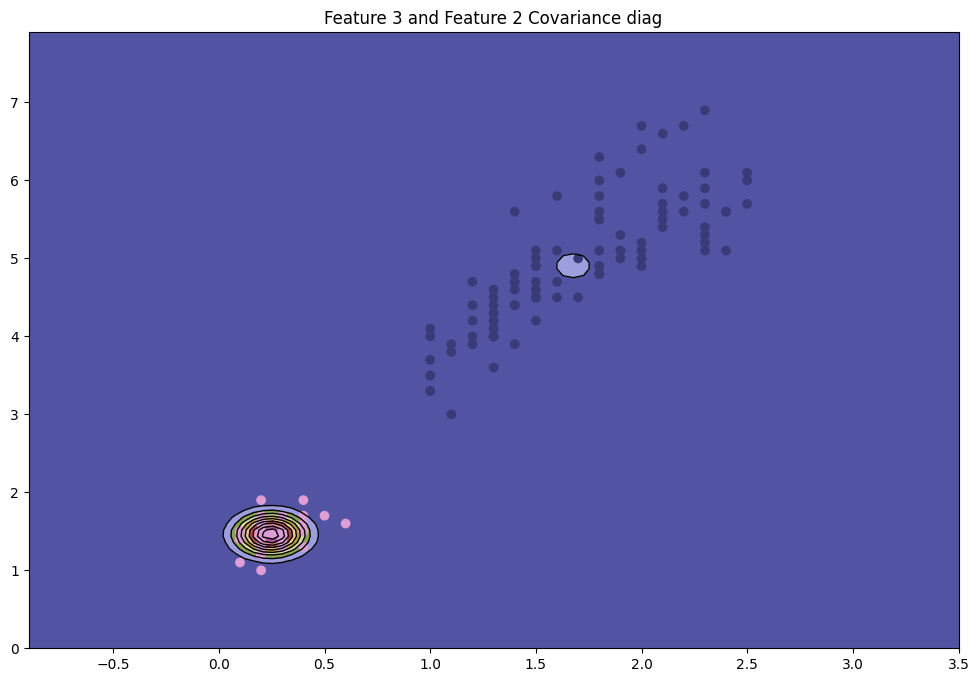

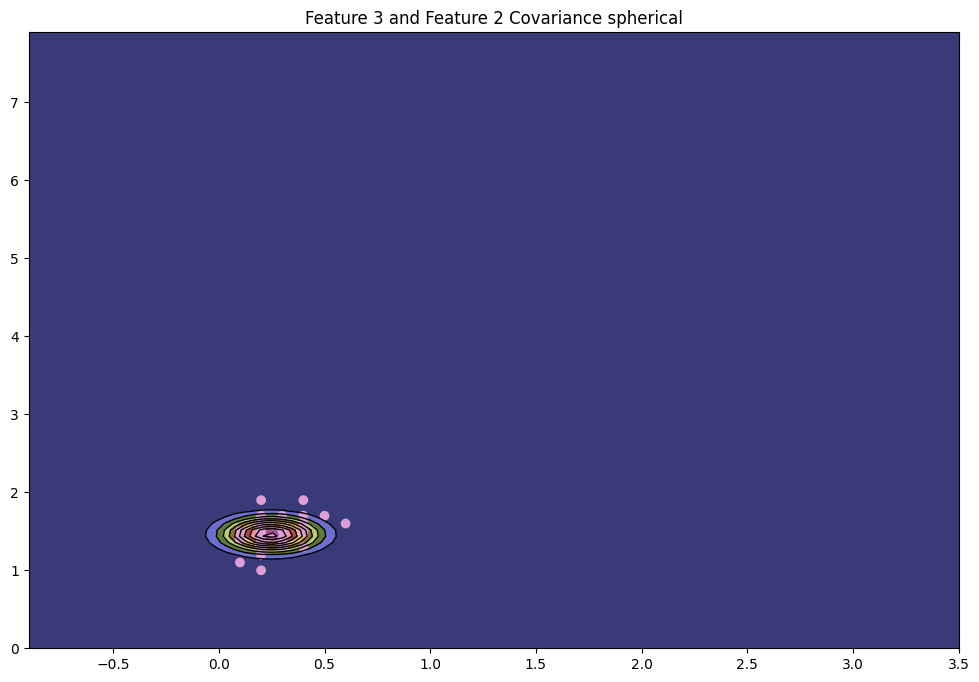

In [65]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from plotnine import *
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from sklearn.datasets import load_iris
%matplotlib inline

def plot_contours():
    covariance =['full', 'tied', 'diag', 'spherical']
    h=0
    for p in range(0,4):
        for o in range (0,4):
            if(p!=o):
                d_temp = pd.DataFrame(iris_data.data)
                d=(d_temp[[d_temp.columns[p],d_temp.columns[o]]]).to_numpy()
                for q in range(0,4):

                    gmm=GaussianMixture(n_components = 2,covariance_type=covariance[q])
                    gmm=gmm.fit(d)


                    plt.figure(h+5)
                    # Define a grid to plot the contour plot
                    x_min, x_max = d[:, 0].min() - 1, d[:, 0].max() + 1
                    y_min, y_max = d[:, 1].min() - 1, d[:, 1].max() + 1
                    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
                    Z = np.zeros((xx.shape[0], xx.shape[1]))
                    for i in range(gmm.n_components):
                        density = multivariate_normal(mean=gmm.means_[i], cov=gmm.covariances_[i]).pdf(np.dstack((xx, yy)))
                        Z += density * gmm.weights_[i]

                    plt.contour(xx, yy, Z, levels=10, linewidths=1, colors='black')
                    plt.contourf(xx, yy, Z, levels=10, cmap='tab20b')
                    plt.scatter(d[:, 0], d[:, 1], c=gmm.predict(d), cmap='tab20b')
                    plt.title('Feature '+str(p)+' and Feature '+str(o)+' Covariance '+covariance[q])
                    plt.show()

def display_cluster(axes,k,z,covariance,labels,X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            axes[k][z].scatter(X[labels==i][0], X[labels==i][1],c = color[i],alpha = alpha,s=s)
            axes[k][z].title.set_text('K = '+str(i+1)+' covariance = '+covariance)

            
iris_data=load_iris()
d = pd.DataFrame(iris_data.data)
# d=(d[[d.columns[0],d.columns[1]]]).to_numpy()
covariance =['full', 'tied', 'diag', 'spherical']
labels = []
gmm=[]
for q in range(0,4):

    for j in range(1,18):

        gmm.append(GaussianMixture(n_components = j,covariance_type=covariance[q]))
        gmm[j-1]=gmm[j-1].fit(d)
        labels.append(gmm[j-1].predict(d))

    k=0
    z=0

    f = plt.figure(q)
    f, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey = True)
    plt.rcParams['figure.figsize'] = [12, 8]

    for j in range(1,7):

        display_cluster(axes,k,z,covariance[q],labels[j-1],d,gmm[j-1],num_clusters=j)

        if j == 3:
            k=k+1
            z=0
        else:
            z=z+1
        

    k=0
    z=0
plot_contours()

## Customer dataset

GMM

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1200x800 with 0 Axes>

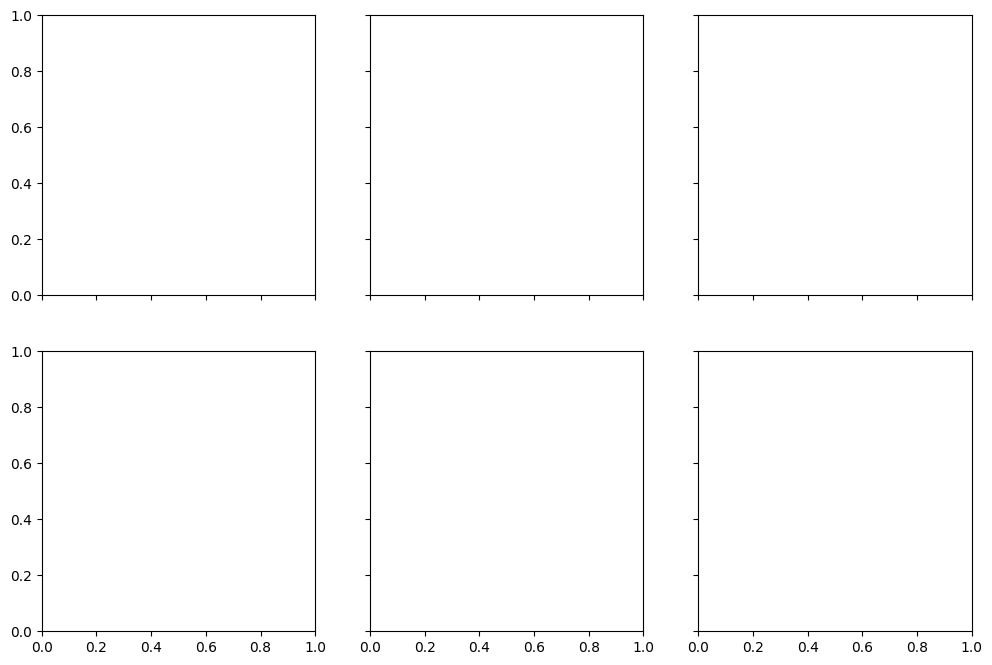

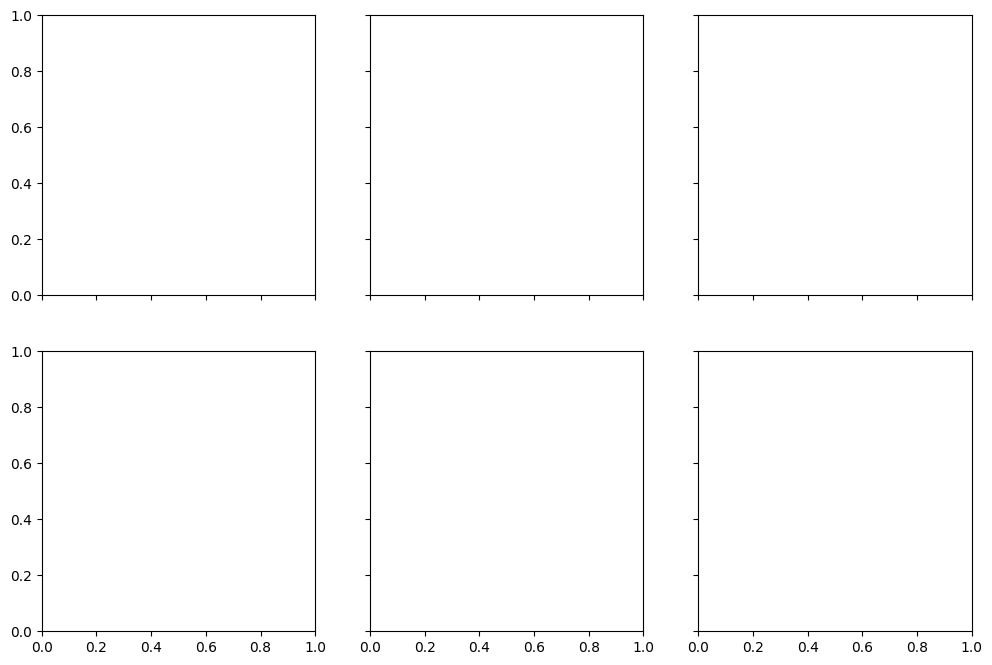

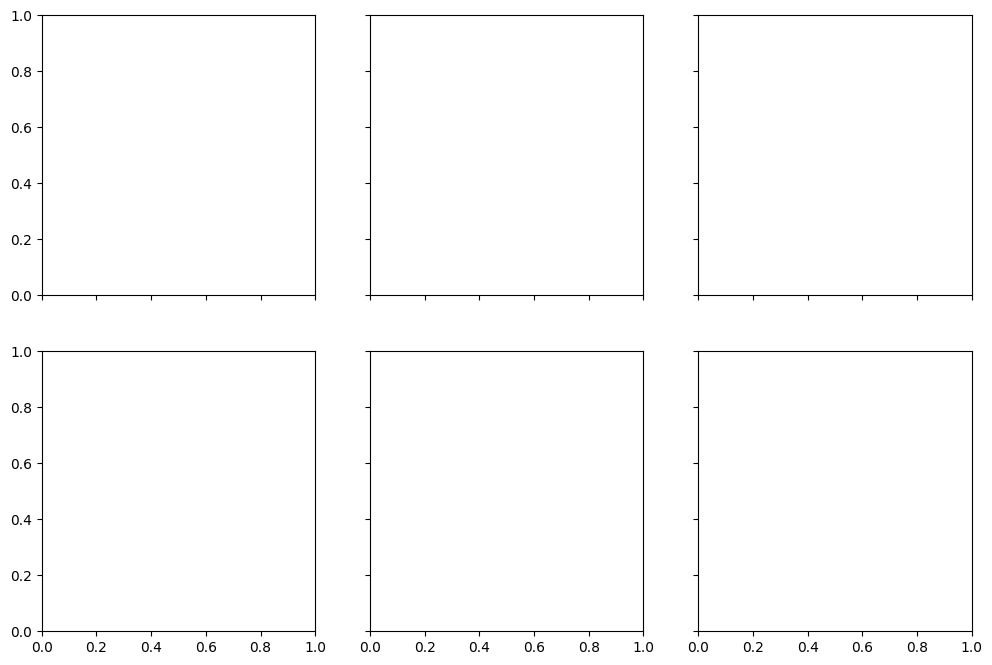

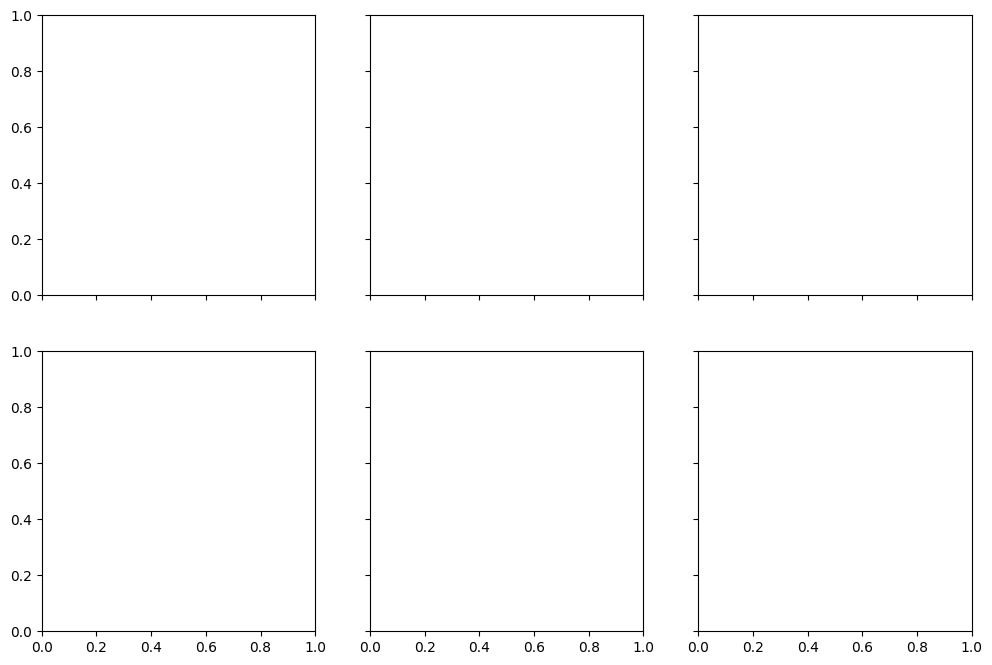

In [90]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from plotnine import *
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from sklearn import preprocessing

from sklearn.datasets import load_iris
%matplotlib inline

def plot_contours():
    covariance =['full', 'tied', 'diag', 'spherical']
    h=0
    for p in range(0,7):
        for o in range (0,7):
            if(p!=o):
                d_temp = pd.DataFrame(df_Cus)
                d_temp = preprocessing.normalize(d_temp)
                d=(d_temp[[d_temp.columns[p],d_temp.columns[o]]])
                for q in range(0,4):

                    gmm=GaussianMixture(n_components = 2,covariance_type=covariance[q])
                    gmm=gmm.fit(d)


                    plt.figure(h+5)
                    # Define a grid to plot the contour plot
                    x_min, x_max = d[:, 0].min() - 1, d[:, 0].max() + 1
                    y_min, y_max = d[:, 1].min() - 1, d[:, 1].max() + 1
                    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
                    Z = np.zeros((xx.shape[0], xx.shape[1]))
                    for i in range(gmm.n_components):
                        density = multivariate_normal(mean=gmm.means_[i], cov=gmm.covariances_[i]).pdf(np.dstack((xx, yy)))
                        Z += density * gmm.weights_[i]

                    plt.contour(xx, yy, Z, levels=10, linewidths=1, colors='black')
                    plt.contourf(xx, yy, Z, levels=10, cmap='tab20b')
                    plt.scatter(d[:, 0], d[:, 1], c=gmm.predict(d), cmap='tab20b')
                    plt.title('Feature '+str(p)+' and Feature '+str(o)+' Covariance '+covariance[q])
                    plt.show()


def display_cluster(axes,k,z,covariance,labels,X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:   
        print(labels)
        print(np.unique(labels))
        for i in range(0,len(np.unique(labels))):

            axes[k][z].scatter(X[labels==i][0], X[labels==i][1],c = color[i],alpha = alpha,s=s)
            axes[k][z].title.set_text('K = '+str(i+1)+' covariance = '+covariance)

     

    
df_Cus= pd.read_csv('Customer data.csv', index_col = 0)
d = pd.DataFrame(df_Cus)
d = preprocessing.normalize(d)

covariance =['full', 'tied', 'diag', 'spherical']
labels = []
gmm=[]
for q in range(0,4):

    for j in range(1,18):

        gmm.append(GaussianMixture(n_components = j,covariance_type=covariance[q]))
        gmm[j-1]=gmm[j-1].fit(d)
        labels.append(gmm[j-1].predict(d))

    k=0
    z=0

    f = plt.figure(q)
    f, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey = True)
    plt.rcParams['figure.figsize'] = [12, 8]

    for j in range(1,7):

#         display_cluster(axes,k,z,covariance[q],labels[j-1],d,gmm[j-1],num_clusters=j)

        if j == 3:
            k=k+1
            z=0
        else:
            z=z+1
        

    k=0
    z=0

plot_contours()